# OneView Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for OneView in 2023 is 42926.9320 dollars. It is profitable, with total net profit at 7865.2683 dollars. This put OneView's profit margin at around 18 %.
>* Revenue growth fluctuates, between positive and negative growth. Highest positive growth is in February, at around 38% growth, while highest negative growth is in March at around -36% growth. By December, growth is around 9.9%. On average, CMGR is around 2.7%.
>* On average, OneView have around 47 users each month, with 12 being active. There is a 88% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* Initial active user of monthly cohorts range between 4 to 10 users, in which numbers would drop down significantly to 1-2 users for most cohort's lifetime. For all cohorts, retention rates would drop to 0% at some point in their monthly lifetime. One exception is the May cohort, as its retention never completely fall to 0%, however its retention is 30% at best (3 users out of 10).
>* As user number fall, generally NDR rates are 0%. May cohort made significant purchase in August (141.83% in NDR ) and in November (118.57% in NDR). This cohort also stand out in cumulative revenue, as it generated around 10k by December.
>* On a per-user basis, there are some negative profit values in the cohorts. Fortunately, this doesnt outweigh the profits made. March, April, and November cohorts have negative values in their lifetime on a per user basis, yet the values were relatively small. May cohort provide the highest (and consistent) positive profits from all the cohorts per user (277.22 by December). 
>
>Profitability
>* Oneview's monthly overall profits show notable fluctuations, both positive and negative, even before considering discounts. Certain periods, particularly around late summer and early winter (August, November, and December), indicate a strong upward trend in overall profits. While some months show downward trends or lower profits, such as April. 
>* Highest overall profit can be seen in August with an overall profit of 1758.9829. While lowest overall profit can be seen in April with an overall profit of -61.0554.
>* OneView shows a reasonable level of resilience in its product performance before discounts, with several months of high profits and only a few periods of volatility.
>
>Discounting EDA
>* 65 out of 165 invoices in 2023 had discounts (~39%), indicating strong demand at full price.
>* August remains the most profitable month, but profits decrease significantly from 1758.9829 to 1509.0853 after discounts.
>* April experiences the biggest negative impact, with profits dropping from -61.0554 to -234.4170 after discounts.
>* About 57% of discounted orders are orders in the 20% discount range. However, a significant number of orders (27 out of 65 discounted orders) are applied very high discounts (80%).
>* Offering discounts up to 20% attracts customers while maintaining profitability, but 80% discounts lead to significant losses.
>
>Ideal Customer Profile (ICP) EDA
>* For OneView, focus on enhancing the SMB segment, which leads in Total Accounts (55.97%), Net Revenue (50.66%), Total Quantity (57.34%), and Total Sales (50.97%). It shows strong financial health with a Net Profit Before Discount of 4,864.06 and a substantial Net Profit of 3,443.28. Sustain the Strategic segment with high contributions in Total Accounts (33.33%), Net Revenue (43.02%), and Total Sales (42.51%), achieving a Net Profit Before Discount of 4,804.40 and a Net Profit of 3,928.95. Maintain the Enterprise segment, ensuring efficient cost management with a Net Profit Before Discount of 738.65 and a Net Profit of 493.04, despite its lower shares.
>* In the SMB segment, high-performing industries include Finance (EMEA), Consumer Products (AMER), Retail (AMER), Healthcare (EMEA), and Communications (EMEA). High-risk sectors like Consumer Products and Finance in APJ contribute to severe losses.
>* In the Strategic segment, Finance (EMEA & AMER), Healthcare (AMER), and Energy (APJ) lead performance, but Tech and Finance in APJ face significant losses. Stable industries require cautious discount management to maintain profitability.
>* In the Enterprise segment, Manufacturing (EMEA), Finance (AMER), and Energy (AMER) are top performers, while sectors like Consumer Products (APJ) and Tech (AMER) struggle with profitability. High discounts often lead to financial losses in struggling areas.
>* All significant losses across segments are predominantly from the APJ region. High discounts, likely intended to boost sales, often resulted in negative profits, suggesting the strategy may not have been as effective as intended.
>* AMER in February, August, and October see robust sales and net profits, with August being the peak month. Discounts significantly impact profits in June and December.
>* EMEA in January, November, and December show strong sales and net profits, leading the overall performance despite discount impacts. January and September are notably affected by discounts. EMEA demonstrates the highest overall performance, with strong sales and net profits despite the impact of discounts.
>* APJ has lower overall sales, with peaks in June and December, but frequent negative net profits due to high discounts. Significant discounts in April and December drive negative profitability.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [4]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [5]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [6]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [7]:
#slice main df by product first
prod10 = df.query("Product == 'OneView'")
# then slice product df by year of analysis
prod10_2023=prod10.query('year == 2023')

----

### General Performance Report

In [7]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod10_2023['reg_date'] = prod10_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_10680\3699928617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod10_2023['reg_date'] = prod10_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [8]:
# make a user df, from the product df
prod10_2023_user = prod10_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [9]:
# from user df, extract month datetime data, from date of first purchase
prod10_2023_user['reg_month']= prod10_2023_user['reg_date'].values.astype('datetime64[M]')

In [10]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod10_2023_user['key'] = 1
prod10_2023_user = template_table.merge(prod10_2023_user,on='key')
prod10_2023_user =prod10_2023_user.drop('key',axis=1)

In [11]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod10_2023_user = prod10_2023_user[prod10_2023_user['Month']>=prod10_2023_user['reg_month']]

In [12]:
prod10_2023['Month'] = prod10_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod10_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod10_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod10_2023_user = prod10_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod10_2023_user = prod10_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_10680\3430662133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod10_2023['Month'] = prod10_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
prod10_2023_user['user'] = 1    
prod10_2023_user['new user'] = (prod10_2023_user['reg_month'] == prod10_2023_user['Month']) * 1 
prod10_2023_user['active'] = (prod10_2023_user['Sales'] > 0) * 1   
prod10_2023_user['active_prev'] = (prod10_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod10_2023_user['change_status'] = (prod10_2023_user['active'] != prod10_2023_user['active_prev']) * 1
prod10_2023_user['session_id'] = (prod10_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod10_2023_user['inactive'] = (prod10_2023_user['active'] == 0) * 1
prod10_2023_user['month_inactive'] = (prod10_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
#OneView monthly user report (2023)
prod10_2023_report = prod10_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod10_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,19.0000,5.0000,2548.0000,2139.7664,831.1234,422.8898,5,5,5
2023-02-01,43.0000,9.0000,3521.4820,3511.0884,987.8866,977.4930,13,8,8
2023-03-01,51.0000,12.0000,2439.9940,2345.4756,493.6663,399.1479,23,10,12
2023-04-01,31.0000,9.0000,678.7860,505.4244,-61.0554,-234.4170,30,7,9
2023-05-01,49.0000,15.0000,2577.7120,2550.1580,719.5614,692.0074,40,10,15
2023-06-01,45.0000,10.0000,3159.7240,3114.3928,942.0576,896.7264,48,8,10
2023-07-01,30.0000,8.0000,1054.6820,1000.9412,196.6046,142.8638,53,5,8
2023-08-01,73.0000,14.0000,6621.7760,6371.8784,1758.9829,1509.0853,59,6,13
2023-09-01,73.0000,21.0000,3722.4600,3409.1400,905.0737,591.7537,65,6,18


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [15]:
prod10_2023_churn = prod10_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod10_2023_churn['old active'] = (prod10_2023_churn['active'] - prod10_2023_churn['new user'])
prod10_2023_churn['user churn'] = ((1 - (prod10_2023_churn['old active'] / prod10_2023_churn['user'].shift(1))) * 100).round()
prod10_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,2548.0000,422.8898,5,5,5,0,NaN
2023-02-01,3521.4820,977.4930,13,8,8,0,100.0000
2023-03-01,2439.9940,399.1479,23,10,12,2,85.0000
2023-04-01,678.7860,-234.4170,30,7,9,2,91.0000
2023-05-01,2577.7120,692.0074,40,10,15,5,83.0000
2023-06-01,3159.7240,896.7264,48,8,10,2,95.0000
2023-07-01,1054.6820,142.8638,53,5,8,3,94.0000
2023-08-01,6621.7760,1509.0853,59,6,13,7,87.0000
2023-09-01,3722.4600,591.7537,65,6,18,12,80.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [29]:
prod10_2023_churn[["new user"]].mean()

new user   6.5833
dtype: float64

In [17]:
#monthly avg. user churn
prod10_2023_churn[["user", "active", "user churn"]].mean()

user         46.5833
active       12.1667
user churn   87.9091
dtype: float64

In [20]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report=pd.DataFrame(prod10_2023.groupby(['month'])[['Sales', 'net_profit']].sum()).reset_index()

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 2548.0000, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month difference'], axis=1)

sales_report

,month,Sales,net_profit,CMGR
0,1,2548.0000,422.8898,0.0000
1,2,3521.4820,977.4930,38.2057
2,3,2439.9940,399.1479,-2.1424
3,4,678.7860,-234.4170,-35.6555
4,5,2577.7120,692.0074,0.2903
5,6,3159.7240,896.7264,4.3975
6,7,1054.6820,142.8638,-13.6716
7,8,6621.7760,1509.0853,14.6182
8,9,3722.4600,591.7537,4.8525
9,10,3339.4180,756.3742,3.0510


In [21]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

-0.30284180429042457

In [22]:
# The CMGR is normally distributed
sales_report['CMGR'].mean()

2.742731388354296

In [23]:
prod10_2023[['Sales', 'net_profit']].sum()

Sales        42926.9320
net_profit    7865.2683
dtype: float64

In [24]:
# Total monthly profit margin
(7865.2683/ 42926.9320) * 100

18.32245616807649

In [25]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.7869
net_profit,0.7869,1.0000


**Key findings:**
1. On average, OneView have around 47 users each month, with 12 being active. There is a 88% likelihood of users churning in the next month. Number of accounts and quantity of purchases tend to increase by the end of the year, starting from August (14 accounts and 73 units purchased). By December total accounts is 25, with 105 purchased units. Number of new users tend to remain consistent (4 new user in December), with an average of 7 new users every month.
2. Revenue growth fluctuates, between positive and negative growth. Highest positive growth is in February, at around 38% growth, while highest negative growth is in March at around -36% growth. By December, growth is around 9.9%. On average, CMGR is around 2.7%.
3. Total revenue for OneView in 2023 is 42926.9320 dollars. It is profitable, with total net profit at 7865.2683 dollars. This put OneView's profit margin at around 18 %.
4. Based on total monthly data, increase in monthly revenue for OneView seems to equal an increase in monthly profit. Using a correlation test, we can see that there is a medium positive correlation between revenue and profit.

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod10_2023_user['date']=prod10_2023_user['Month'].dt.to_period('M')
prod10_2023_user['cohort']= prod10_2023_user['reg_month'].dt.to_period('M')
prod10_2023_user['lifetime'] = (prod10_2023_user['date'] - prod10_2023_user['cohort']).apply(attrgetter('n'))

In [16]:
prod10_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1006,Aviva,2023-01-16,2023-01-01,9.0000,1958.5440,1566.8352,708.2530,316.5442,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1010,AT&T,2023-01-25,2023-01-01,3.0000,25.8600,25.8600,6.7236,6.7236,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod10_cohort = prod10_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod10_cohort ['active rate'] = (prod10_cohort['active'] / prod10_cohort['user']) * 100
prod10_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,5,5,5,100.0000
1,2023-01-01,1,5,0,0,0.0000
2,2023-01-01,2,5,0,2,40.0000
3,2023-01-01,3,5,0,0,0.0000
4,2023-01-01,4,5,0,1,20.0000
...,...,...,...,...,...,...
73,2023-10-01,1,4,0,2,50.0000
74,2023-10-01,2,4,0,1,25.0000
75,2023-11-01,0,6,6,6,100.0000
76,2023-11-01,1,6,0,0,0.0000


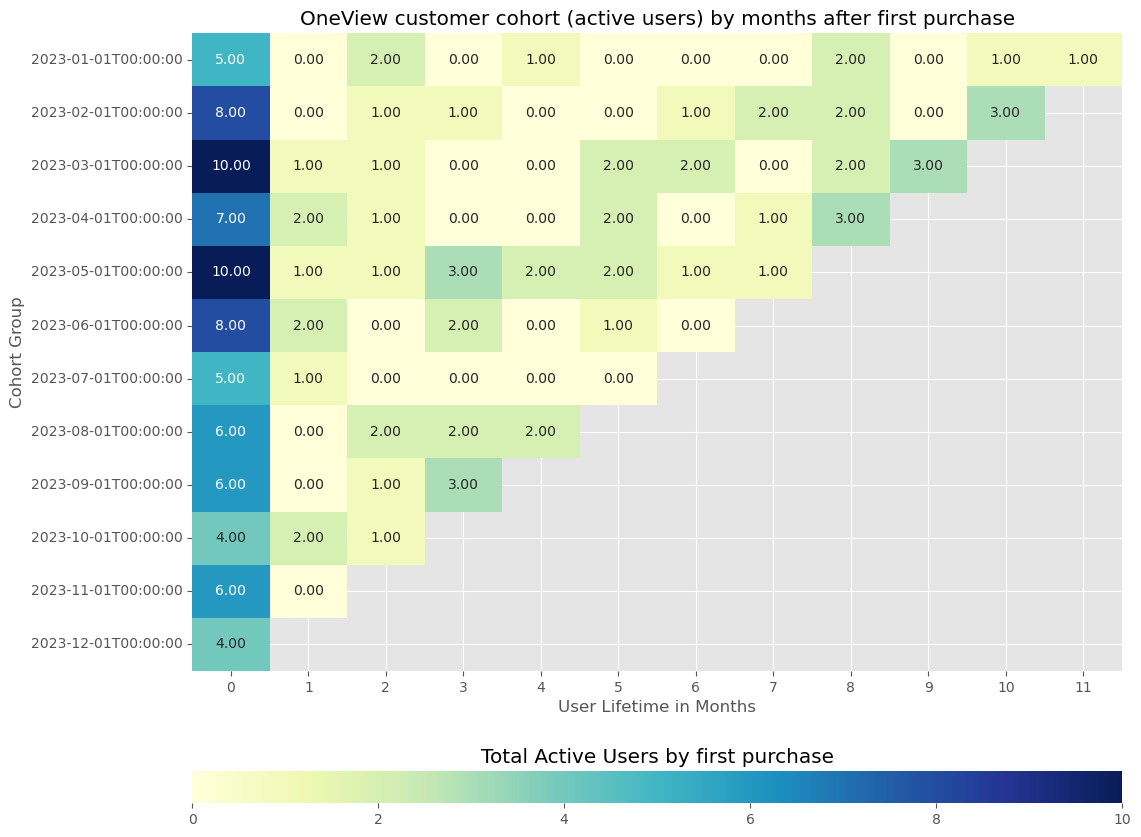

In [ ]:
# customer cohort
pivot0 =prod10_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='OneView customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- Initial active user of monthly cohorts range between 4 to 10, with March and April being the highest (10).
- After their initial purchase, numbers drop down significantly, with some cohorts having no returning users after the second month.
- There is increased activity in September, as January to June cohorts all have 2 returning users.

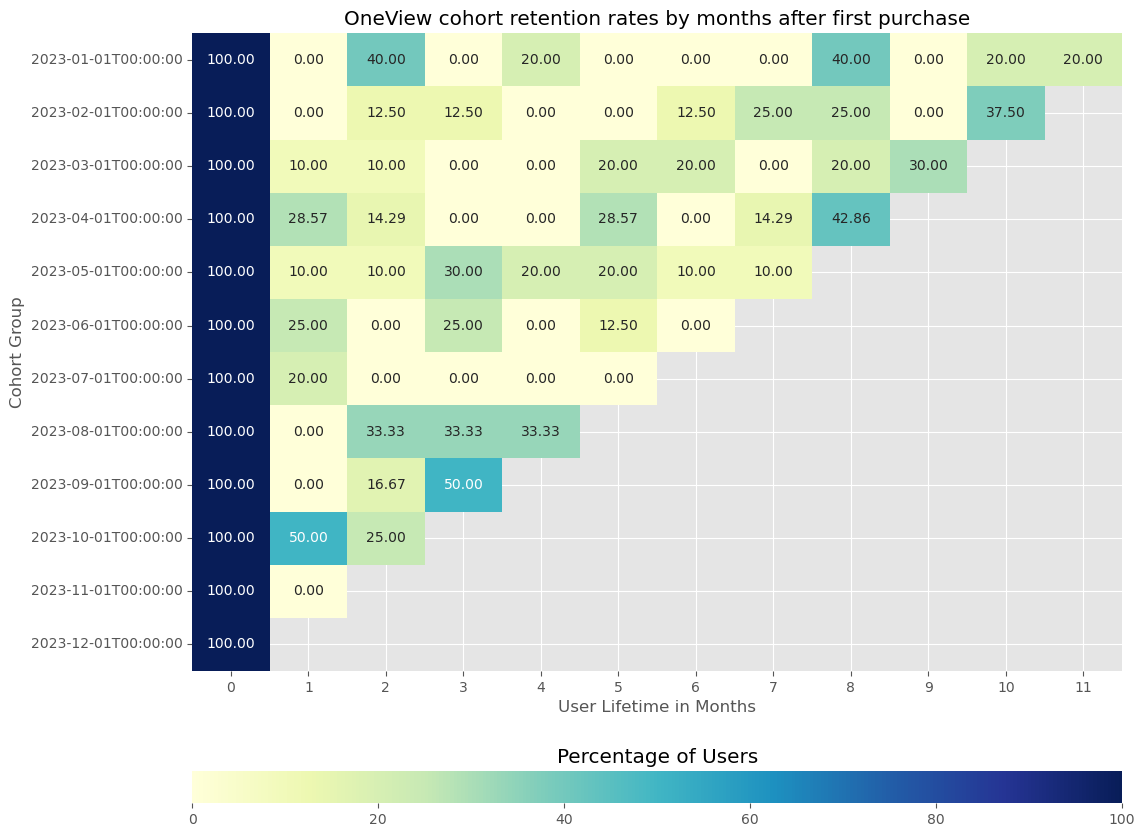

In [19]:
# customer retention
pivot1 =prod10_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='OneView cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- With few users in the initial month, generally retention rates would drop to 0% at some point in their montly lifetime for all cohorts. 
- May cohort is significant in that its retention never completely fall to 0%, however number of users drop significantly than the initial month (30% is the highest).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

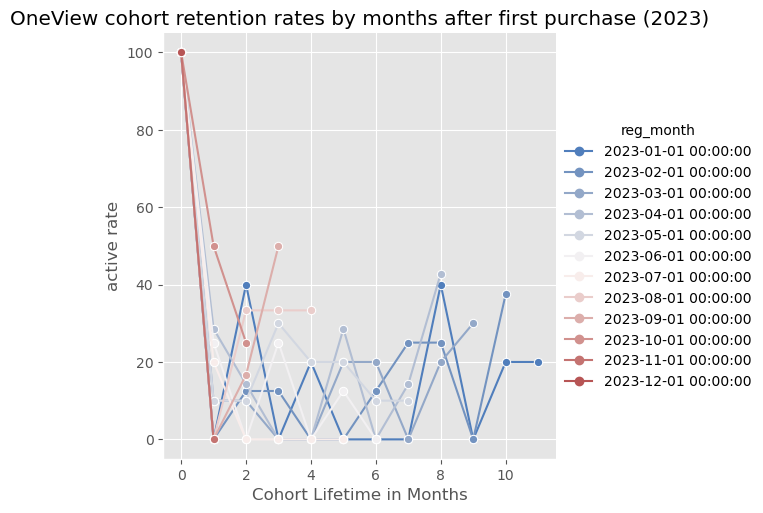

In [20]:
# retention rate lineplots
sns.relplot(data=prod10_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('OneView cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [16]:
prod10_cohort2 =prod10_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

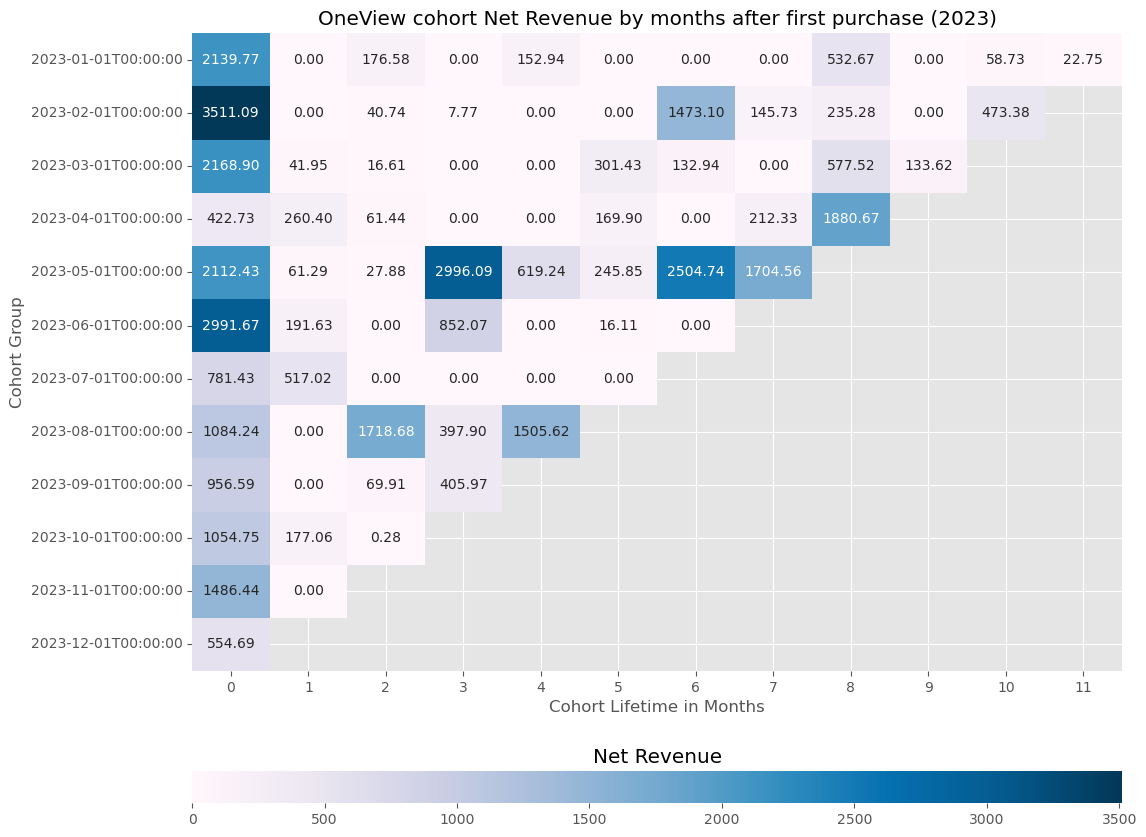

In [22]:
# Net Revenue by Cohort
pivot2 =prod10_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='OneView cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- Generally for cohorts, many have months without purchases.
- May cohort have significant subsequent purchases after its initial purchase (2112.43), with two months its lifetime exceeding the initial purchase (in August, 2996.09; and in November, 2504.74). This is the only cohort to have purchases that exceed its initial purchase.

In [17]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod10_2023_user.loc[prod10_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod10_cohort2 = prod10_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod10_cohort2 ['net dollar retention'] = (prod10_cohort2['discounted_sales'] / prod10_cohort2['ds_max']) * 100

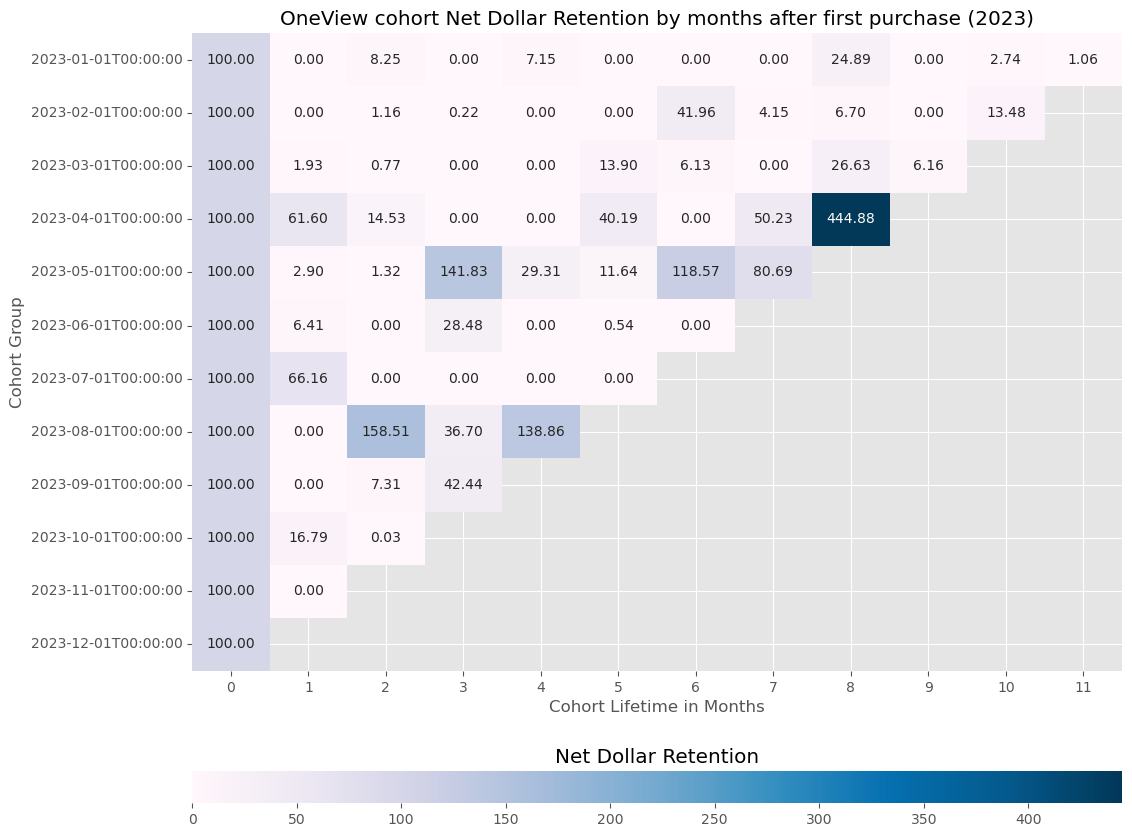

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod10_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='OneView cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

- For OneView, as there are few subsequent purchases, generally NDR rates are 0%.
- There are months where rates exceed 100% after initial purchase. In December, the April cohort made a significant purchase amounting to 444.88% in NDR, while the August cohort made a purchase amounting to 138.86% in NDR (it also made a 158.51% NDR purchase earlier, in October). May cohort made significant purchase in August (141.83% in NDR ) and in November (118.57% in NDR).

In [18]:
prod10_cohort2 ['cumulative lifetime revenue'] = prod10_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

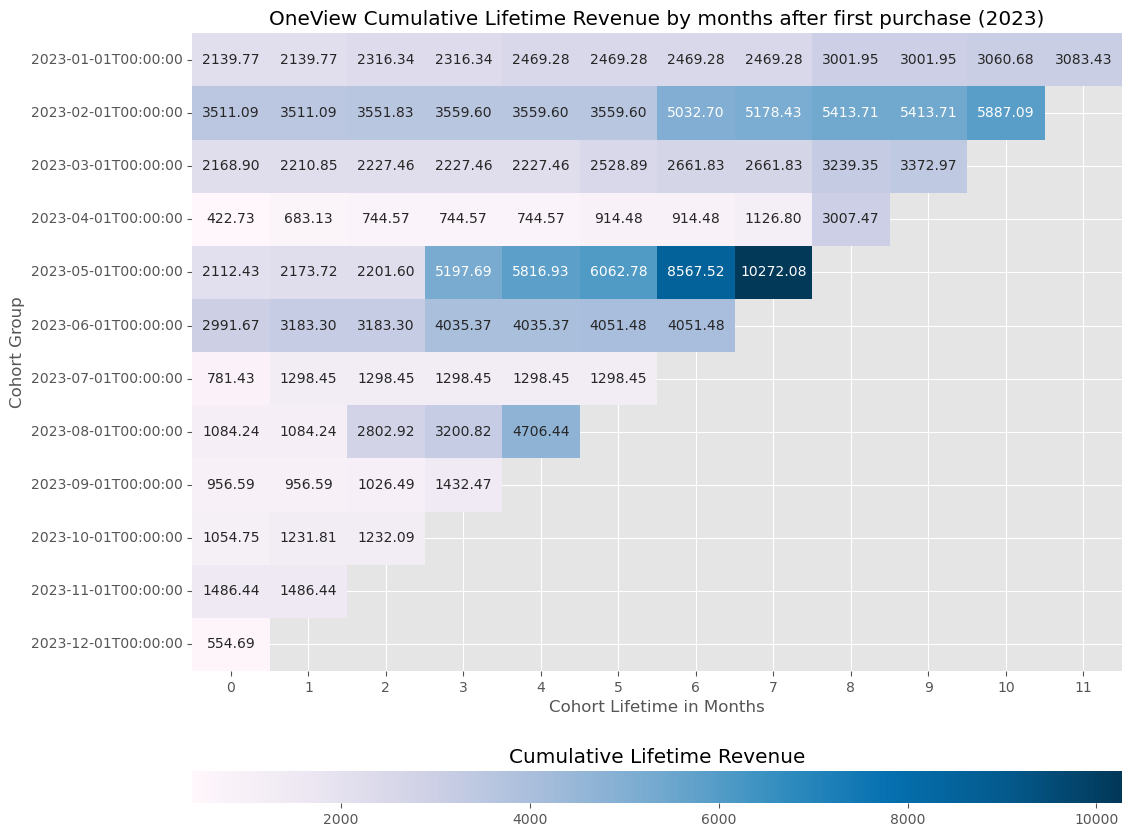

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod10_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='OneView Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

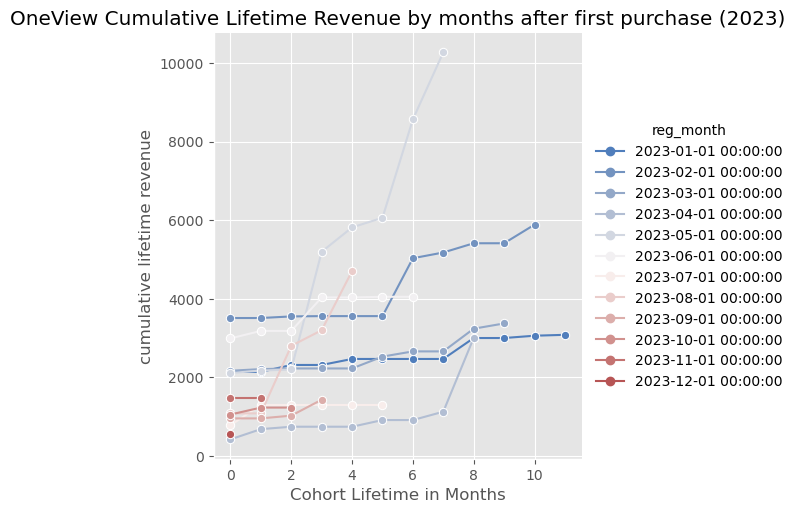

In [ ]:
# some data are easier to read with a different chart- cumulative lifetime revenue lineplots
sns.relplot(data=prod10_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('OneView Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- We can see one cohort standing out above the rest in cumulative revenue, the May cohort. It generated around 10k in revenue by December. It also has significant subsequent purchases, with little stagnation between months, making it upwards trending.
- Most cohort are relatively stagnant, only having at least one significant subsequent purchase.

In [19]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod10_2023_user.loc[prod10_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod10_cohort2 = prod10_cohort2.merge(user_max,how='left',on=['reg_month'])
prod10_cohort2 ['customer lifetime revenue'] = (prod10_cohort2['cumulative lifetime revenue'] / prod10_cohort2['user_max'])

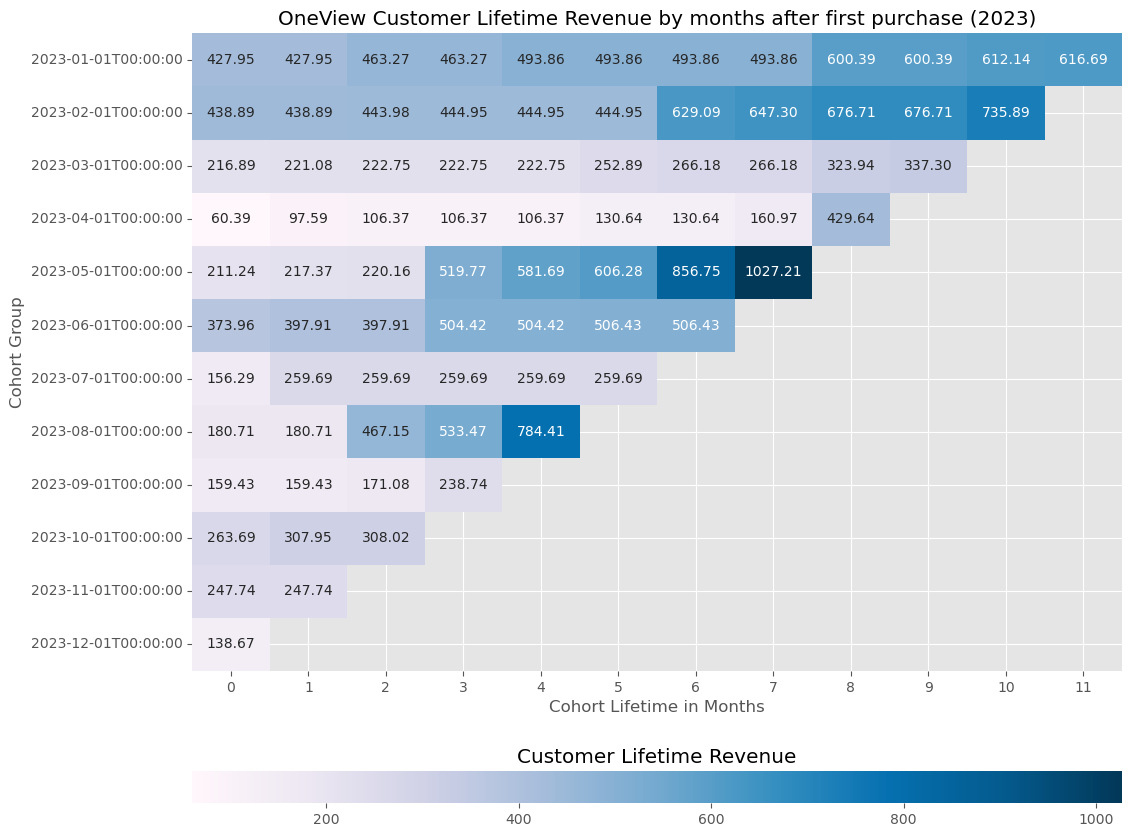

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod10_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='OneView Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

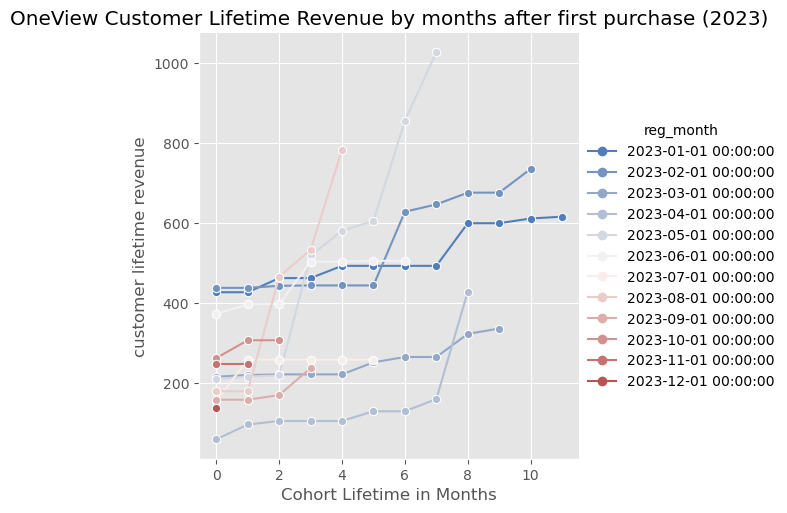

In [22]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod10_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('OneView Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- On a per customer basis, the highest can be observed in the May Cohort. Though its initial per-user value isn't the highest (211.24), by December each user in the cohort on average would pay 1027.21.

In [20]:
# CLV - but with net profit
prod10_cohort2 ['cum_net_profit'] = prod10_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod10_cohort2 ['Customer Lifetime Value'] = (prod10_cohort2['cum_net_profit'] / prod10_cohort2['user_max'])

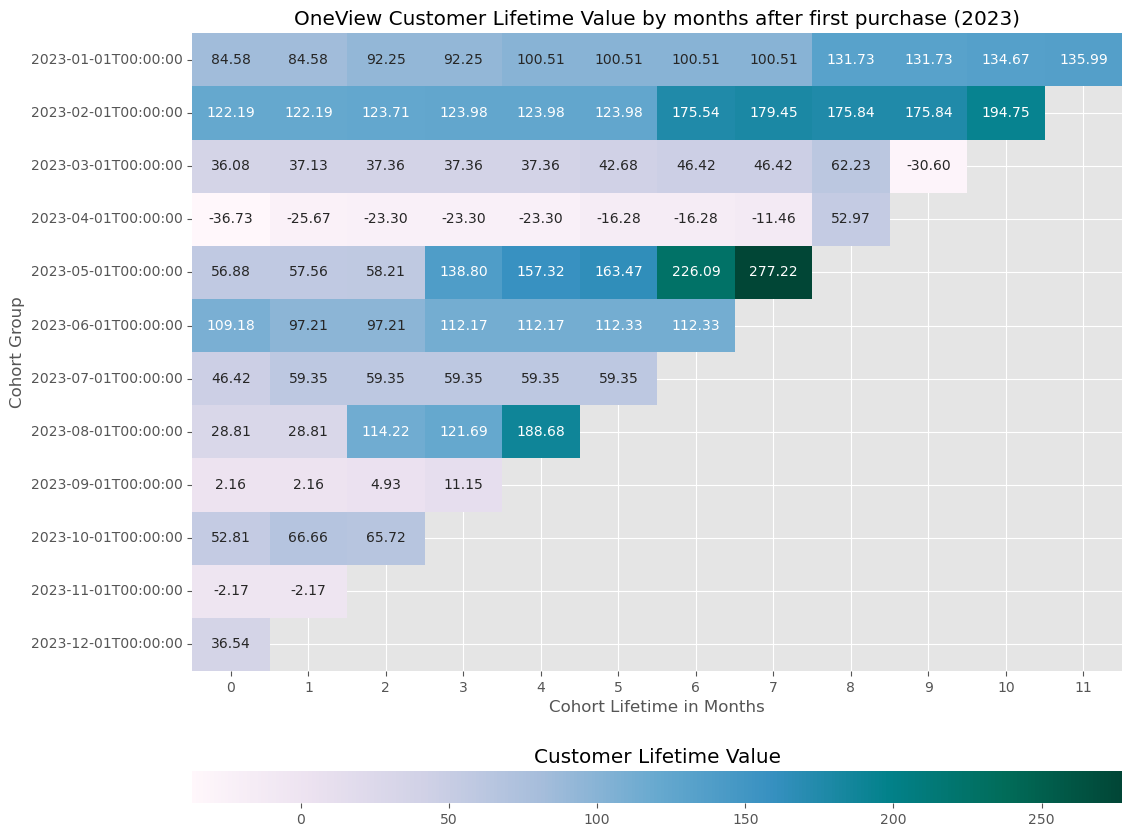

In [ ]:
# Customer Lifetime Value, by cohort
pivot6 =prod10_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='OneView Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

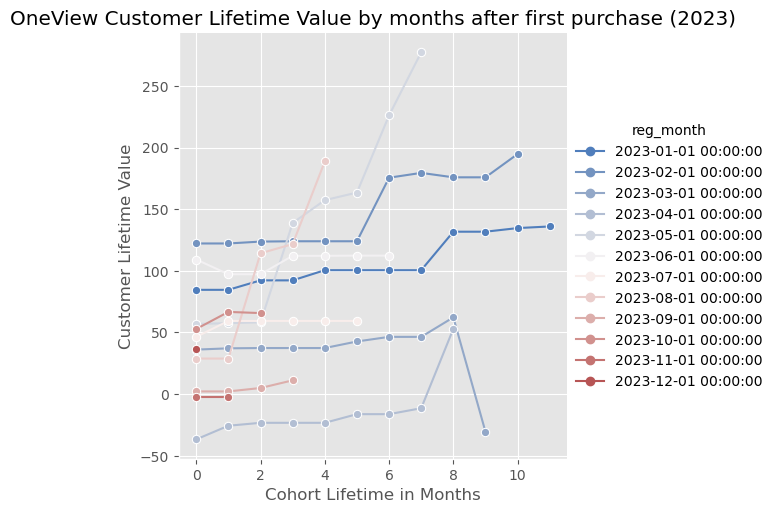

In [22]:
#  customer lifetime value lineplots
sns.relplot(data=prod10_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('OneView Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [ ]:
# April cohort average per user value (9 months lifetime)
(((36.73 + 25.67 + (23.30*3) + (16.28*2) + 11.46) * -1) + 52.97) / 9 

-13.705555555555557

In [30]:
# March cohort average per user value (10 months lifetime)
((36.08 + 37.13 + (37.36*3) + 42.68 + (46.42*2) + 62.23) - 30.60) / 10

35.24400000000001

- It can be observed that there are some negative profit values per user in the cohorts, meaning that OneView is potentially contributing to losses.
- March (10 users), April (7 users), and November (6 users) cohorts have negative values in their lifetime on a per user basis. April cohort has had one positive month (in December), however, for most its lifetime per user values were negative (-13.7 on average). On the opposite end, March has had one negative month (also in December), but for most its lifetime per user values were positive (35.24 on average). Meanwhile November cohort has had only one purchase, with per user values being negative, at -2.17.
- May cohort provide the highest (and consistent) positive profits from all the cohorts per user (277.22 by December). Based on the CLV, this cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of April cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1. Initial active user of monthly cohorts range between 4 to 10 users, in which numbers would drop down significantly to 1-2 users for most cohort's lifetime. For all cohorts, retention rates would drop to 0% at some point in their monthly lifetime. One exception is the May cohort, as its retention never completely fall to 0%, however its retention is 30% at best (3 users out of 10).
2. As user number fall, generally NDR rates are 0%. May cohort made significant purchase in August (141.83% in NDR ) and in November (118.57% in NDR). This cohort also stand out in cumulative revenue, as it generated around 10k by December.
3. On a per-user basis, there are some negative profit values in the cohorts. Fortunately, this doesnt outweigh the profits made. March, April, and November cohorts have negative values in their lifetime on a per user basis, yet the values were relatively small. May cohort provide the highest (and consistent) positive profits from all the cohorts per user (277.22 by December). 

### Profitability

In [21]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod10_2023[prod10_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod10_2023[prod10_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

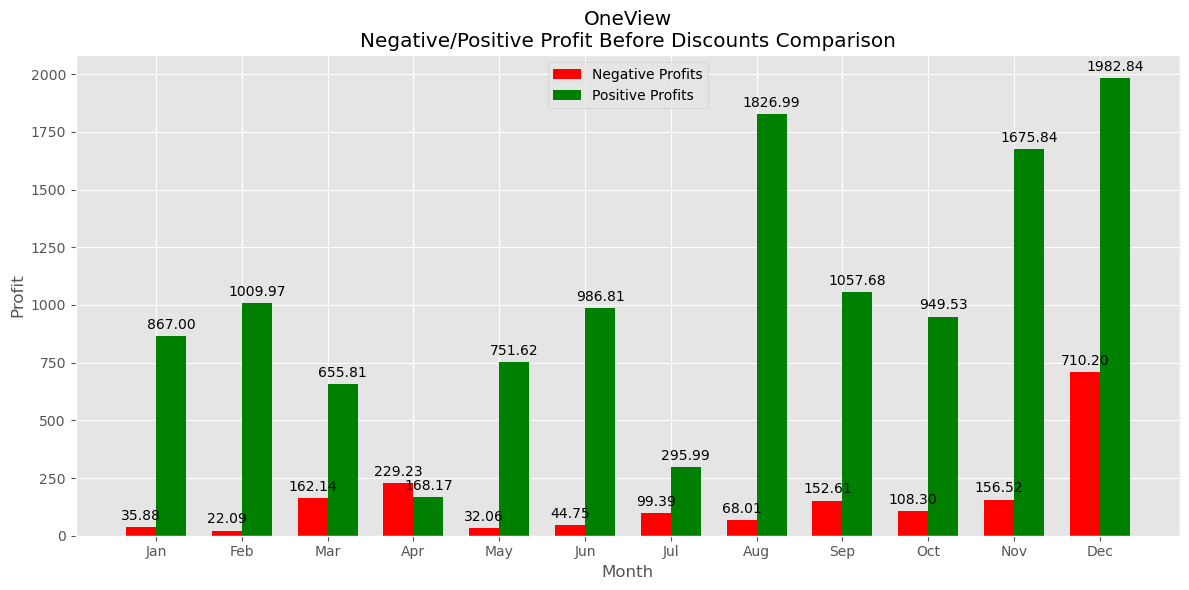

In [22]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('OneView\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

**Key Findings:** 
1. Oneview's monthly overall profits show notable fluctuations, both positive and negative, even before considering discounts. Certain periods, particularly around late summer and early winter (August, November, and December), indicate a strong upward trend in overall profits. While some months show downward trends or lower profits, such as April.
2. Highest overall profit can be seen in August with an overall profit of 1758.9829.
3. Lowest overall profit can be seen in April with an overall profit of -61.0554.
4. OneView shows a reasonable level of resilience in its product performance before discounts, with several months of high profits and only a few periods of volatility.

### Discounting EDA

In [24]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod10_2023[(prod10_2023['net_profit'] < 0)]
post_discount_positives = prod10_2023[(prod10_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

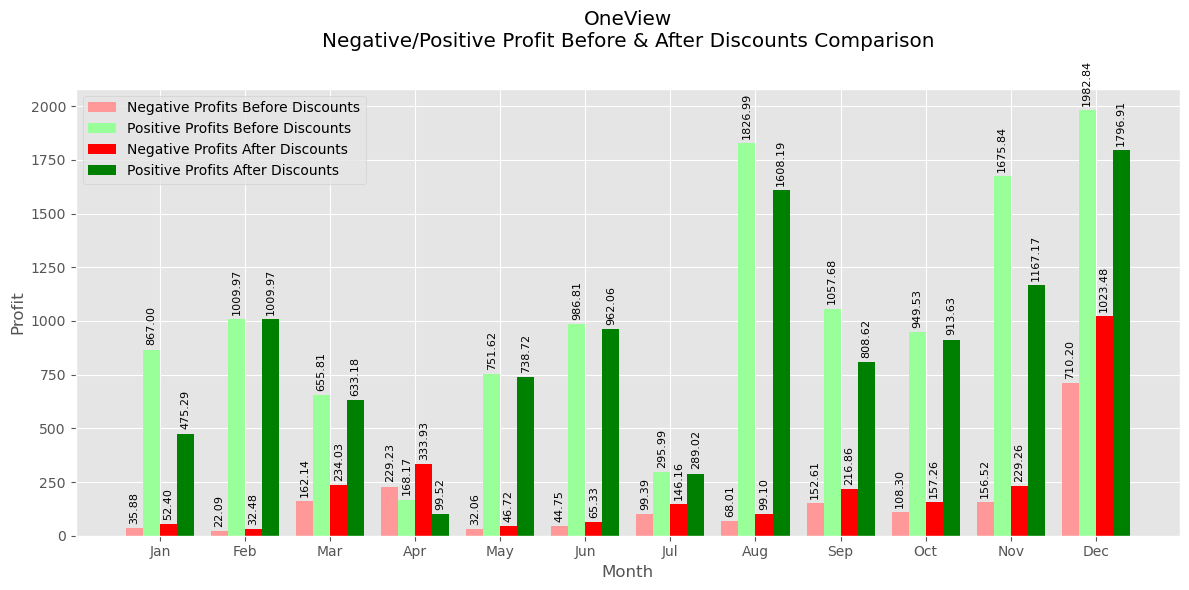

In [26]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('OneView\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

- Discounts generally result in lower overall profits for OneView, both in months with high profits and months with low or negative profits.
- August remains the most profitable month after accounting for discounts. Before discounts, August had an overall profit of 1758.9829, this significantly decreases to 1509.0853 after discounts, resulting in a loss of 249.8976. Despite this reduction, August still holds the highest profitability among all the months.
- April sees the biggest negative impact, as overall profit before discounts was already low at -61.0554. After applying discounts, the profit dropped further into the negative, reaching -234.4170, resulting in a significant decrease of 173.3616. However, April is the only month with a negative overall profit after discounts.
- After discounts, OneView shows a reasonable level of resilience in its product performance, with several months maintaining strong profits despite reductions. 

In [27]:
discount_month = prod10_2023.query("Discount > 0").groupby(['Customer ID','Month'])[['Discount']].agg('count').reset_index()
prod10_2023_user = prod10_2023_user.merge(discount_month,how='left',on=['Customer ID','Month'])
account_count = prod10_2023.groupby(['Customer ID','Month'])[['Order ID']].count().reset_index()
account_count.columns = ['Customer ID','Month', 'account_cnt']
prod10_2023_user = prod10_2023_user.merge(account_count,how='left',on=['Customer ID','Month'])

In [28]:
discount_report = prod10_2023_user.groupby('Month')[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active', 'Discount', 'account_cnt']].agg('sum')
discount_report

,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active,Discount,account_cnt
Month,,,,,,,,,,
2023-01-01,19.0000,2548.0000,2139.7664,831.1234,422.8898,5,5,5,4.0000,6.0000
2023-02-01,43.0000,3521.4820,3511.0884,987.8866,977.4930,13,8,8,1.0000,9.0000
2023-03-01,51.0000,2439.9940,2345.4756,493.6663,399.1479,23,10,12,4.0000,12.0000
2023-04-01,31.0000,678.7860,505.4244,-61.0554,-234.4170,30,7,9,6.0000,9.0000
2023-05-01,49.0000,2577.7120,2550.1580,719.5614,692.0074,40,10,15,3.0000,15.0000
2023-06-01,45.0000,3159.7240,3114.3928,942.0576,896.7264,48,8,10,8.0000,12.0000
2023-07-01,30.0000,1054.6820,1000.9412,196.6046,142.8638,53,5,8,2.0000,8.0000
2023-08-01,73.0000,6621.7760,6371.8784,1758.9829,1509.0853,59,6,13,5.0000,14.0000
2023-09-01,73.0000,3722.4600,3409.1400,905.0737,591.7537,65,6,18,7.0000,22.0000


In [29]:
prod10_2023_user[['account_cnt']].sum()

account_cnt   165.0000
dtype: float64

In [30]:
prod10_2023_user[['Discount']].sum()

Discount   65.0000
dtype: float64

In [31]:
(65 / 165) * 100

39.39393939393939

- There were 165 invoices for OneView in 2023, 65 of which were applied discounts (~39%). With more orders being without discounts, this suggests a strong demand for OneView, with customers willing to pay the full price.

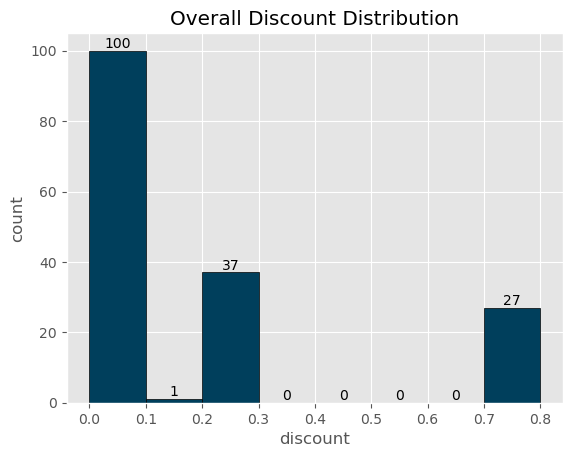

In [33]:
n, bins, patches = plt.hist(data=prod10_2023, x='Discount', bins=8, color='#003f5c', edgecolor='black')
plt.title('Overall Discount Distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

In [35]:
1 + 37 + 27

65

In [36]:
37/65

0.5692307692307692

In [37]:
27/65

0.4153846153846154

- Out of 65 orders that were discounted 1 is a 10% discount, 37 are 20% discounts, and 27 are 80% discounts.
- We can see about 57% of orders are orders in the 20% discount range, which imply that this is the optimal discount range that attracts the majority of customers. This indicates that customers are still willing to purchase Marketing Suite without the need for excessive discounting.
- However, quite a significant number of orders (27 out of 65 discounted orders) are applied very high discounts (80%). This could significantly impact overall profitability, especially if these orders are on high-value items.

In [34]:
# Range of Discounts (February, April, August, November)
filtered_df = prod10_2023[prod10_2023['month'].isin([2, 4, 8, 11])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std      mean       min    median       75%      max  \
month Discount                                                             
2     0.0000   179.8479  126.2466    3.4086   30.5468  165.2507 459.3960   
      0.8000        NaN  -32.4800  -32.4800  -32.4800  -32.4800 -32.4800   
4     0.0000    13.8880   19.3574   10.4875   12.2220   23.7923  35.3626   
      0.2000     8.8955   10.3612    1.8207    8.8375   14.7948  21.9492   
      0.8000   107.7532 -166.9670 -243.1600 -166.9670 -128.8705 -90.7740   
8     0.0000   220.5526  166.6619   22.6233   54.9504  152.0232 654.7554   
      0.2000    27.8814   27.0580    0.8960   21.3543   39.1108  64.6272   
      0.8000        NaN  -99.1032  -99.1032  -99.1032  -99.1032 -99.1032   
11    0.0000   191.4071   89.0494    2.2412   21.5249   41.1071 626.1850   
      0.2000    42.4066   34.5851    1.2585   19.3144   44.9432 130.2885   
      0.8000    89.5100  -76.4187 -179.7760  -24.7716  -24.7401 -24.7086   

                count  
month Discount         
2     0.0000        8  
      0.8000        1  
4     0.0000        3  
      0.2000        4  
      0.8000        2  
8     0.0000        9  
      0.2000        4  
      0.8000        1  
11    0.0000       10  
      0.2000        8  
      0.8000        3

- 0% discount consistently demonstrates profitability across all analyzed months. In February, the mean profit is 179.8479 with a median of 165.2507. In April, the mean profit is 13.8880 with a median of 12.2220. For August, the mean profit reaches 220.5526 with a median of 152.0232. Finally, in November, the 0% discount range maintains a mean profit of 191.4071 with a median of 41.1071. These values illustrate that not offering discounts is consistently more profitable.
- 20% discount is generally profitable but less so than no discounts. In April, the mean profit with a 20% discount is 10.3612 compared to 13.8880 with no discount. In August, the 20% discount has a mean profit of 27.0580, while no discount yields 220.5526. In November, the mean profit for a 20% discount is 34.5851, compared to 191.4071 with no discount.
- Across all months, 80% discounts consistently result in significant losses.
- Overall, offering discounts up to 20% can help attract customers while maintaining profitability, whereas higher discounts (e.g., 80%) lead to substantial losses.

**Key findings:**
1. 65 out of 165 invoices in 2023 had discounts (~39%), indicating strong demand at full price.
2. About 57% of discounted orders are orders in the 20% discount range. However, a significant number of orders (27 out of 65 discounted orders) are applied very high discounts (80%).
3. August remains the most profitable month, but profits decrease significantly from 1758.9829 to 1509.0853 after discounts.
4. April experiences the biggest negative impact, with profits dropping from -61.0554 to -234.4170 after discounts.
5. Offering discounts up to 20% attracts customers while maintaining profitability, but 80% discounts lead to significant losses.
6. OneView shows resilience with strong profits in several months despite discounts.

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod10_2023_segment = prod10_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod10_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod10_2023_percents = segment_account.merge(prod10_2023_segment,how='left',on=['Segment'])
prod10_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,17,65,2796.2540,2550.6444,738.6462,493.0366
1,SMB,89,375,21881.0500,20460.2788,4864.0559,3443.2847
2,Strategic,53,214,18249.6280,17374.1764,4804.3986,3928.9470


In [8]:
# calculate percentage of segment's business share by category
prod10_2023_percents['% Account']= prod10_2023_percents['account'] / prod10_2023_percents['account'].sum() *100
prod10_2023_percents['% Quantity']= prod10_2023_percents['Quantity'] / prod10_2023_percents['Quantity'].sum() *100
prod10_2023_percents['% Sales']= prod10_2023_percents['Sales'] / prod10_2023_percents['Sales'].sum() *100
prod10_2023_percents['% Net Revenue']= prod10_2023_percents['discounted_sales'] / prod10_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod10_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod10_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

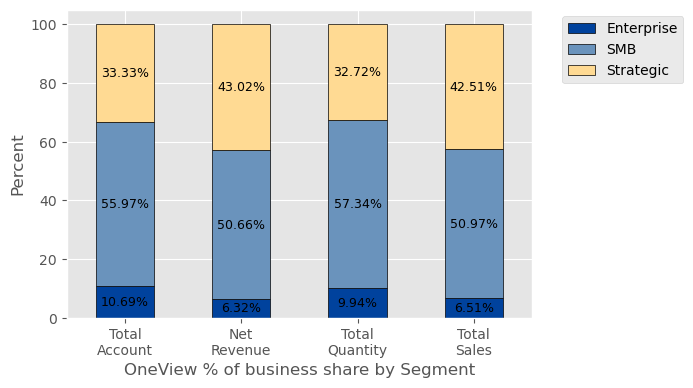

In [35]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod10_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('OneView % of business share by Segment')
plt.ylabel('Percent')

- In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "OneView" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for OneView based on the last year of company activity.
- SMB segment has the highest share across all categories: Total Accounts, Net Revenue, Total Quantity, and Total Sales, indicating it is the dominant segment for the OneView product.

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

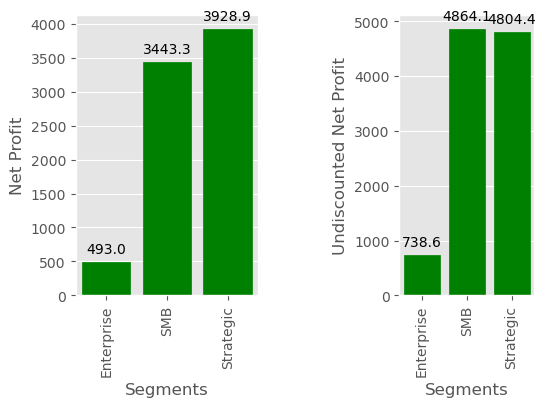

In [36]:
# OneView net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod10_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod10_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- SMB segment dominates the OneView product with the highest share across all categories: Total Accounts (55.97%), Net Revenue (50.66%), Total Quantity (57.34%), and Total Sales (50.97%). This segment also shows the highest Net Profit Before Discount (4864.0559) and a substantial positive Net Profit (3443.2847), indicating robust financial health and effective revenue generation.
- Strategic segment also demonstrates strong performance, holding a significant share in Total Accounts (33.33%), Net Revenue (43.02%), and Total Sales (42.51%). It has a high Net Profit Before Discount (4804.3986) and a positive Net Profit (3928.9470), showing solid profitability and contribution to the overall financial success of the OneView product.
- Enterprise segment, while maintaining the lowest share across categories (Total Accounts: 10.69%, Net Revenue: 6.32%, Total Quantity: 9.94%, Total Sales: 6.51%), also delivers positive financial results with a Net Profit Before Discount of 738.6462 and a Net Profit of 493.0366, demonstrating efficient cost management and profitability.

In summary, the OneView product is driven by strong performance from the SMB and Strategic segments, with both contributing significantly to revenue and profitability. The Enterprise segment, although smaller in share, remains profitable and contributes positively to the overall success of the product.

### Further Inquiries on Segments -----------

In [12]:
# Copy-pasted code for Industry queries within segment
# Industries using OneView within the SMB Segment
prod10_2023_industry_SMB = prod10_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod10_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod10_2023_percents_SMB = SMB_account.merge(prod10_2023_industry_SMB,how='left',on=['Industry'])
prod10_2023_percents_SMB['% Account']= prod10_2023_percents_SMB['account'] / prod10_2023_percents_SMB['account'].sum() *100
prod10_2023_percents_SMB['% Quantity']= prod10_2023_percents_SMB['Quantity'] / prod10_2023_percents_SMB['Quantity'].sum() *100
prod10_2023_percents_SMB['% Sales']= prod10_2023_percents_SMB['Sales'] / prod10_2023_percents_SMB['Sales'].sum() *100
prod10_2023_percents_SMB['% Net Revenue']= prod10_2023_percents_SMB['discounted_sales'] / prod10_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod10_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod10_SMB = percents_SMB.columns.tolist()
# Industries using OneView within the Strategic Segment
prod10_2023_industry_Strategic = prod10_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod10_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod10_2023_percents_Strategic = Strategic_account.merge(prod10_2023_industry_Strategic,how='left',on=['Industry'])
prod10_2023_percents_Strategic['% Account']= prod10_2023_percents_Strategic['account'] / prod10_2023_percents_Strategic['account'].sum() *100
prod10_2023_percents_Strategic['% Quantity']= prod10_2023_percents_Strategic['Quantity'] / prod10_2023_percents_Strategic['Quantity'].sum() *100
prod10_2023_percents_Strategic['% Sales']= prod10_2023_percents_Strategic['Sales'] / prod10_2023_percents_Strategic['Sales'].sum() *100
prod10_2023_percents_Strategic['% Net Revenue']= prod10_2023_percents_Strategic['discounted_sales'] / prod10_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod10_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod10_Strategic = percents_Strategic.columns.tolist()
# Industries using OneView within the Enterprise Segment
prod10_2023_industry_Enterprise = prod10_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod10_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod10_2023_percents_Enterprise = Enterprise_account.merge(prod10_2023_industry_Enterprise,how='left',on=['Industry'])
prod10_2023_percents_Enterprise['% Account']= prod10_2023_percents_Enterprise['account'] / prod10_2023_percents_Enterprise['account'].sum() *100
prod10_2023_percents_Enterprise['% Quantity']= prod10_2023_percents_Enterprise['Quantity'] / prod10_2023_percents_Enterprise['Quantity'].sum() *100
prod10_2023_percents_Enterprise['% Sales']= prod10_2023_percents_Enterprise['Sales'] / prod10_2023_percents_Enterprise['Sales'].sum() *100
prod10_2023_percents_Enterprise['% Net Revenue']= prod10_2023_percents_Enterprise['discounted_sales'] / prod10_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod10_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod10_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

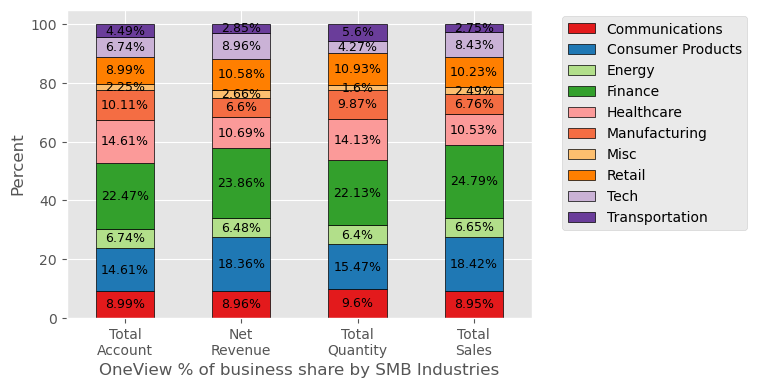

In [38]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod10_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('OneView % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry leads across multiple categories: Total Accounts (22.47%), Net Revenue (23.86%), and Total Sales (24.79%), indicating a dominant presence in the SMB segment.
- Consumer Products industry has significant shares in Net Revenue (18.36%) and Total Sales (18.42%), with a notable presence in Total Accounts (14.61%).
- Healthcare and Retail industries show moderate shares in Total Accounts (14.61% and 8.99% respectively), Net Revenue (10.69% and 10.58%), and Total Sales (10.53% and 10.23%).
- Communications and Tech industries maintain moderate shares across categories.
- Manufacturing and Energy industries contribute to the SMB segment but with relatively lower shares.
- Misc and Transportation industries show the lowest shares across categories but maintain a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

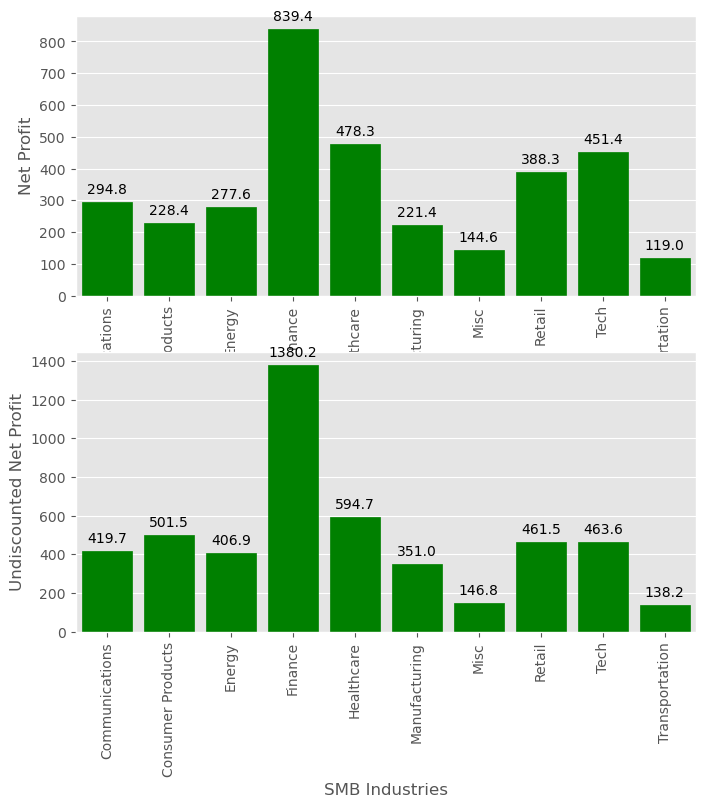

In [39]:
# OneView net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod10_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod10_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry dominates the SMB segment with the highest Net Revenue (23.86%) and Net Profit Before Discount (1380.1713), achieving a substantial positive Net Profit (839.4481), making it the top performer.
- Consumer Products has significant shares in Net Revenue (18.36%) and Total Sales (18.42%), with a Net Profit Before Discount of 501.4722 and a positive Net Profit of 228.3602.
- Healthcare shows strong performance with a Net Revenue of 10.69% and a substantial Net Profit Before Discount (594.7244), resulting in a positive Net Profit (478.2540).
- Tech industry, although with lower shares in Total Accounts (6.74%) and Net Revenue (8.96%), achieves a notable positive Net Profit of 451.4404.
- Energy and Retail industries also demonstrate positive financial results with Net Profits of 277.6436 and 388.3362, respectively.
- Communications, Manufacturing, Misc, and Transportation contribute positively to the SMB segment's profitability, with Communications and Retail showing moderate shares and Misc maintaining a presence despite lower shares.

Finance, Consumer Products, and Healthcare industries are the key contributors to profitability within the SMB segment of the OneView product, demonstrating strong contributions in both revenue and profitability. The Tech, Energy, and Retail industries also show positive financial performance, while Communications, Manufacturing, Misc, and Transportation maintain a presence and contribute positively to the segment's overall profitability.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

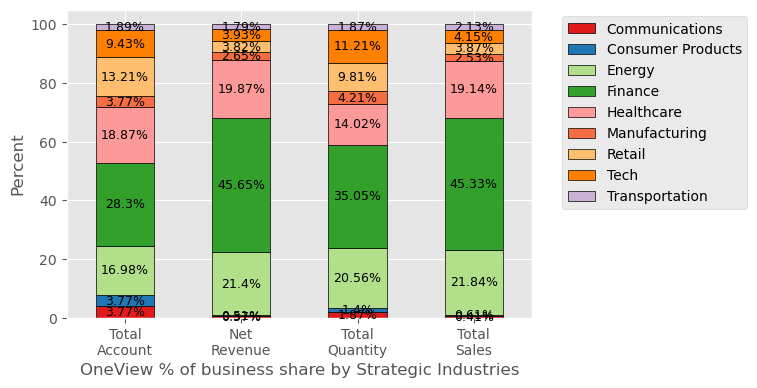

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod10_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('OneView % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (28.30%), Net Revenue (45.65%), Total Quantity (35.05%), and Total Sales (45.33%), indicating a dominant presence in the Strategic segment.
- Energy industry holds a significant share with 16.98% of Total Accounts, 21.40% of Net Revenue, and 21.84% of Total Sales.
- Healthcare industry shows notable shares in Total Accounts (18.87%), Net Revenue (19.87%), and Total Sales (19.14%).
- Retail and Tech industries maintain moderate shares across the categories.
- Communications, Consumer Products, and Manufacturing industries have lower shares but maintain a presence in the segment.
- Transportation shows the lowest shares across the categories but contributes to the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

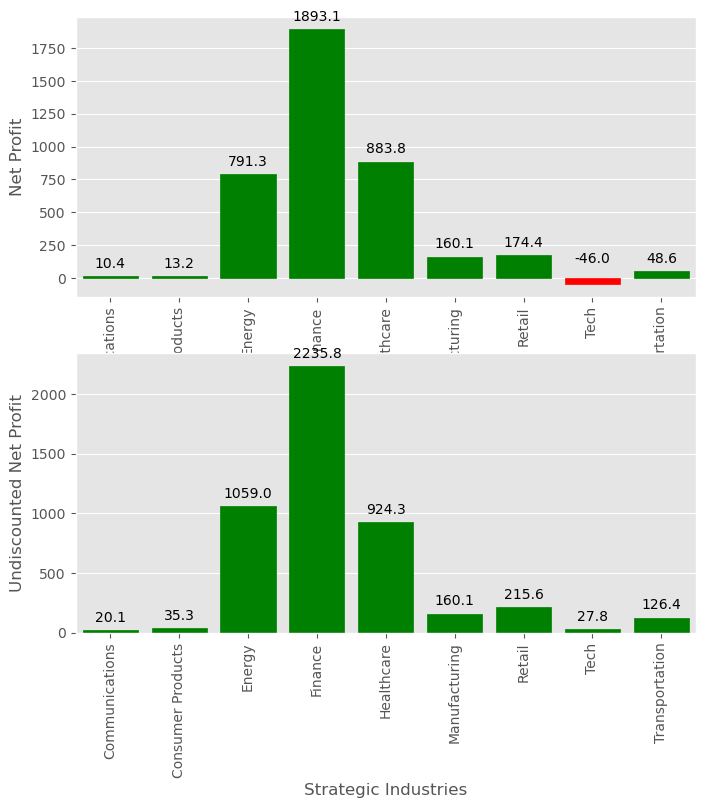

In [41]:
# OneView net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod10_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod10_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry dominates the Strategic segment with the highest Net Revenue (45.65%) and Net Profit Before Discount (2235.7786), achieving a substantial positive Net Profit (1893.1082), making it the top performer.
- Energy holds significant shares in Net Revenue (21.40%) and Total Sales (21.84%), with a substantial Net Profit Before Discount (1058.9637) and a positive Net Profit (791.2789).
- Healthcare shows strong performance with a Net Revenue of 19.87% and a high Net Profit Before Discount (924.2938), resulting in a positive Net Profit (883.7558).
- Tech industry, although with a moderate share in Total Accounts (9.43%) and Net Revenue (3.93%), reports a negative Net Profit of -46.0103, indicating profitability challenges.
- Manufacturing, Retail, and Transportation industries contribute positively to the segment’s profitability, while Communications and Consumer Products maintain lower shares but still achieve positive Net Profits.

Finance, Energy, and Healthcare industries are key contributors to profitability within the Strategic segment of the OneView product, demonstrating strong contributions in both revenue and profitability. The Manufacturing, Retail, and Transportation industries also show positive financial performance, while Communications and Consumer Products contribute modestly. The Tech industry faces challenges in profitability despite its presence in the segment.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

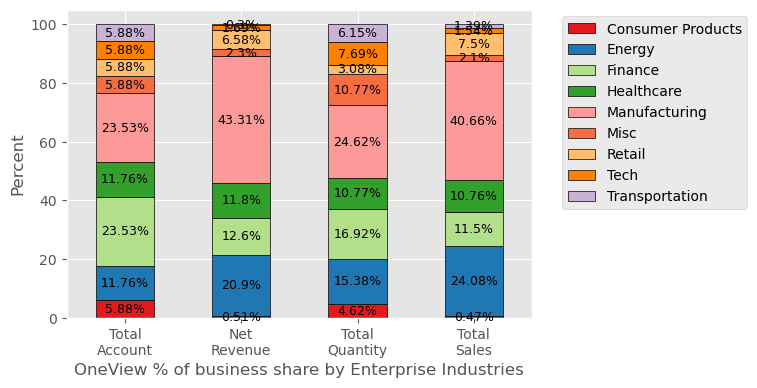

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod10_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('OneView % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Manufacturing industry dominates the Enterprise segment, holding the highest shares in Net Revenue (43.31%) and Total Sales (40.66%), and having a significant presence in Total Accounts (23.53%) and Total Quantity (24.62%).
- Energy industry holds a substantial share with 11.76% of Total Accounts, 20.90% of Net Revenue, and 24.08% of Total Sales.
- Finance industry has notable shares in Total Accounts (23.53%) and Total Quantity (16.92%), with moderate contributions to Net Revenue (12.60%) and Total Sales (11.50%).
- Healthcare shows consistent shares across categories, contributing 11.76% to Total Accounts and 11.80% to Net Revenue.
- Retail, Tech, Misc, and Transportation industries maintain lower shares across the categories but maintain a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Consumer Products'),
  Text(1, 0, 'Energy'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Healthcare'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

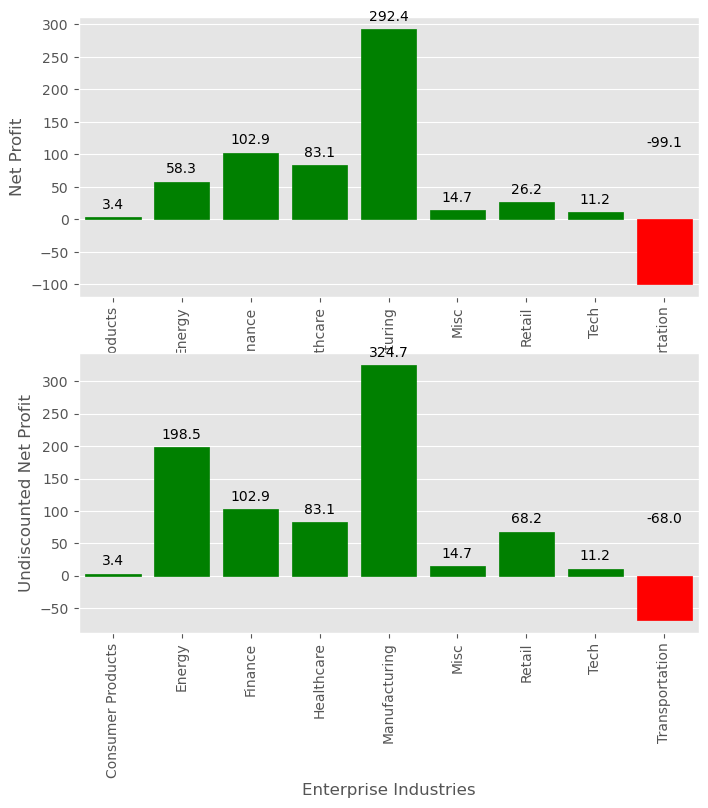

In [43]:
# OneView net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod10_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod10_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Manufacturing dominates the Enterprise segment, leading in Net Revenue (43.31%) and Total Sales (40.66%). It shows strong financial performance with a Net Profit Before Discount of 324.6868 and a positive Net Profit of 292.3732.
- Energy industry holds substantial shares in Net Revenue (20.90%) and Total Sales (24.08%), with a Net Profit Before Discount of 198.5298 and a positive Net Profit of 58.2834.
- Finance industry, while contributing significantly to Total Accounts (23.53%) and Total Quantity (16.92%), achieves a positive Net Profit of 102.8871.
- Healthcare maintains consistent shares across categories, with a positive Net Profit of 83.0750.
- Misc, Tech, Retail, and Consumer Products contribute positively to the segment’s profitability, while Transportation reports a negative Net Profit, indicating challenges in profitability.

Manufacturing, Energy, and Finance industries are key contributors to profitability within the Enterprise segment of the OneView product, demonstrating strong contributions in both revenue and profitability. The Healthcare industry also shows positive financial performance, while Misc, Tech, Retail, and Consumer Products maintain a presence and contribute positively. The Transportation industry faces challenges in profitability despite its presence in the segment.

**Key findings:**
1. For OneView, focus on enhancing the SMB segment, which leads in Total Accounts (55.97%), Net Revenue (50.66%), Total Quantity (57.34%), and Total Sales (50.97%). It shows strong financial health with a Net Profit Before Discount of 4,864.06 and a substantial Net Profit of 3,443.28. Sustain the Strategic segment with high contributions in Total Accounts (33.33%), Net Revenue (43.02%), and Total Sales (42.51%), achieving a Net Profit Before Discount of 4,804.40 and a Net Profit of 3,928.95. Maintain the Enterprise segment, ensuring efficient cost management with a Net Profit Before Discount of 738.65 and a Net Profit of 493.04, despite its lower shares.

### Regional EDA

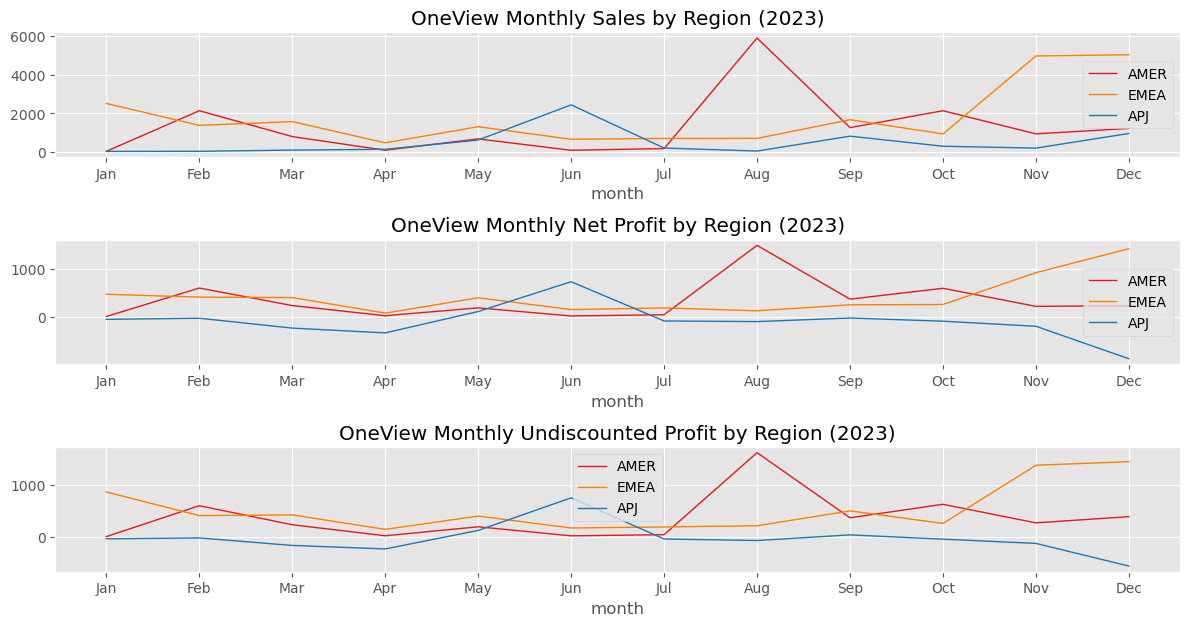

In [8]:
# OneView Monthly Income EDA by Region (2023)
prod10_region_month = prod10_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod10_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod10_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod10_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('OneView Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod10_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod10_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod10_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('OneView Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod10_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod10_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod10_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('OneView Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

Sales and net profits vary significantly across regions and months. EMEA has peaks in January, November, and December, but faces mixed net profits due to discounts. AMER peaks in sales during February and August, generally showing higher net profits but also suffers from discounts. APJ shows strong sales in June but frequently has negative net profits, especially in the first half of the year, due to significant discounts. Overall, discounts play a crucial role in profitability across all regions.
- AMER region showcases robust sales and net profit in February, August, and October. Discounts significantly impact profits in several months, particularly June and December.
- EMEA region demonstrates strong sales and net profit in January, November, and December. However, discounts significantly impact profits in several months, particularly January and September.
- APJ region shows lower sales, but has peaks in June and moderate sales in December. However, significant discounts in several months, such as April and December, lead to negative net profits.

Performance Highlights
- Highest Sales: In AMER, August shows the highest sales of 5887.6720.
- Highest Net Profit: The highest net profit is seen in AMER, August, with a net profit of 1483.4619.
- Highest Undiscounted Profit: AMER in August also shows the highest undiscounted profit at 1612.7163.

In [8]:
prod10_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,3,25.8600,25.8600,6.7236,6.7236
1,AMER,2,20,2126.2100,2126.2100,597.7956,597.7956
2,AMER,3,21,788.9300,788.9300,233.7619,233.7619
3,AMER,4,8,82.6900,82.6900,22.7095,22.7095
4,AMER,5,14,669.5540,660.8096,194.4233,185.6789
5,AMER,6,8,78.9200,75.4240,21.3958,17.8998
6,AMER,7,5,168.1000,168.1000,43.7060,43.7060
7,AMER,8,41,5887.6720,5758.4176,1612.7163,1483.4619
8,AMER,9,22,1252.0200,1252.0200,366.6960,366.6960
9,AMER,10,23,2125.3380,2093.0244,624.7158,592.4022


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

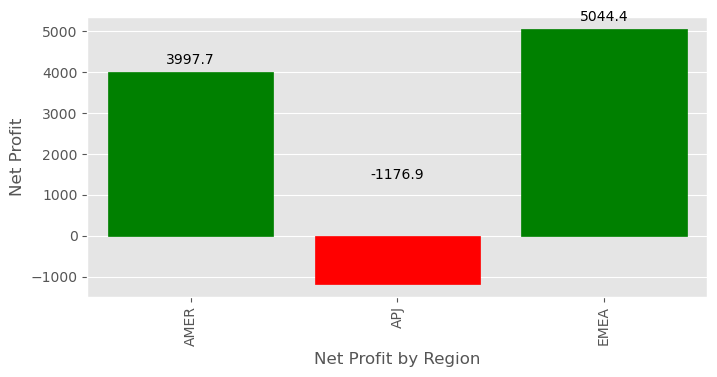

In [9]:
prod10_region = prod10_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod10_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [10]:
prod10_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,211,15344.3000,14958.6004,4383.4235,3997.7239
1,APJ,156,5782.0040,4966.1528,-361.0371,-1176.8883
2,EMEA,287,21800.6280,20460.3464,6384.7143,5044.4327


High-Performing Region
- AMER demonstrates robust performance in sales and net profit, although profitability is slightly lower compared to EMEA.
- EMEA leads in both sales and net profit, showcasing strong overall performance despite the impact of discounts.

Challenging Region
- APJ faces significant challenges in both sales and net profit, with substantial losses primarily due to discounts. Negative profits are particularly noticeable in the first half of the year, peaking in April and also in December.

In [9]:
grouped = prod10_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [10]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

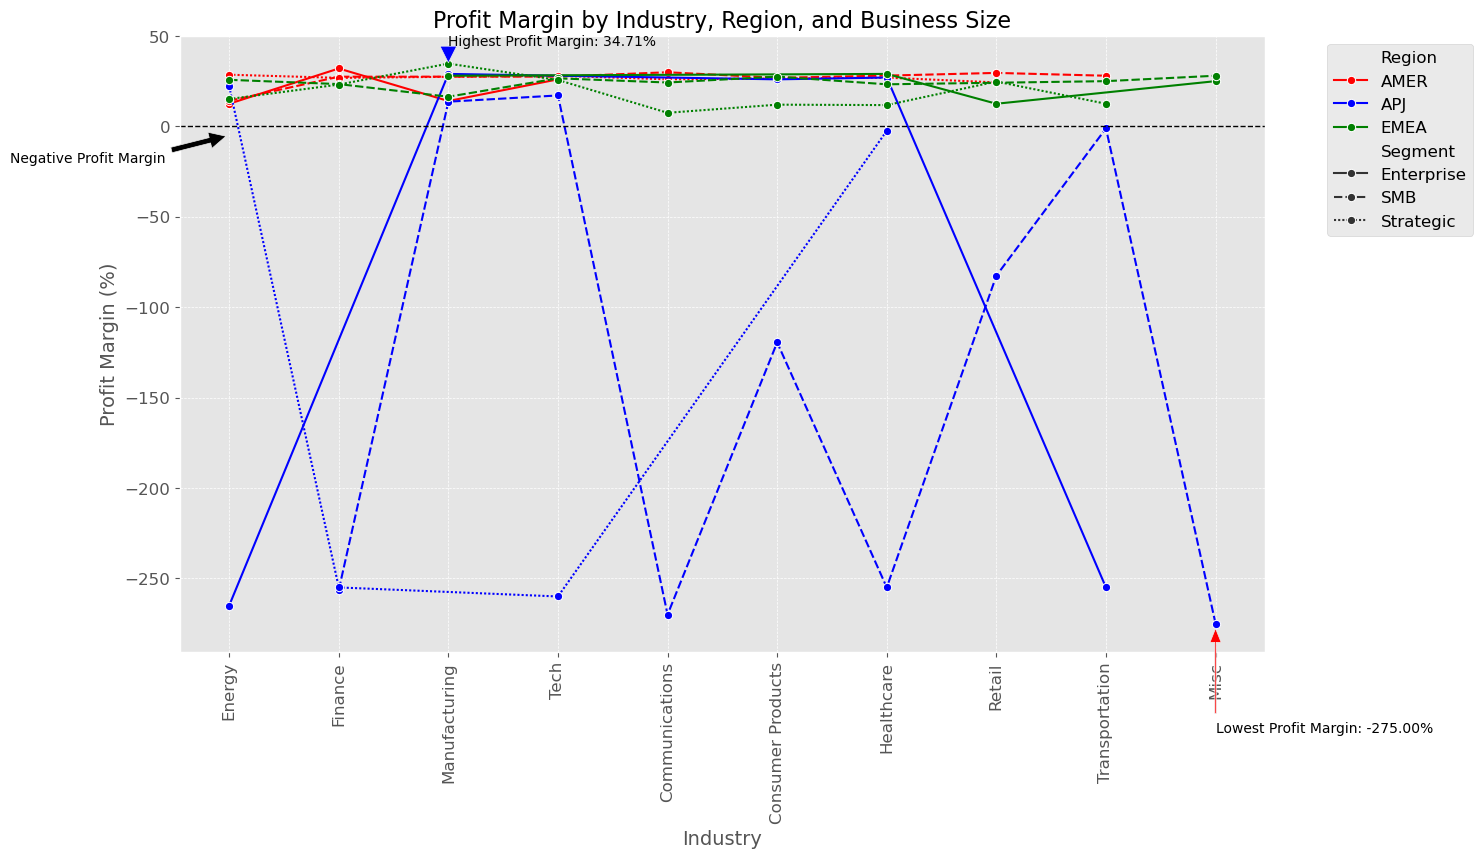

In [11]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Annotate the plot with an arrow pointing outside the chart
plt.annotate(
    'Negative Profit Margin', 
    xy=(0, -5),  # Point of the arrow
    xytext=(-2, -20),  # Position of the text
    arrowprops=dict(facecolor='black', shrink=0.05)
)

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit - 60),  # Move text position to point arrow downwards
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8, headlength=10)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

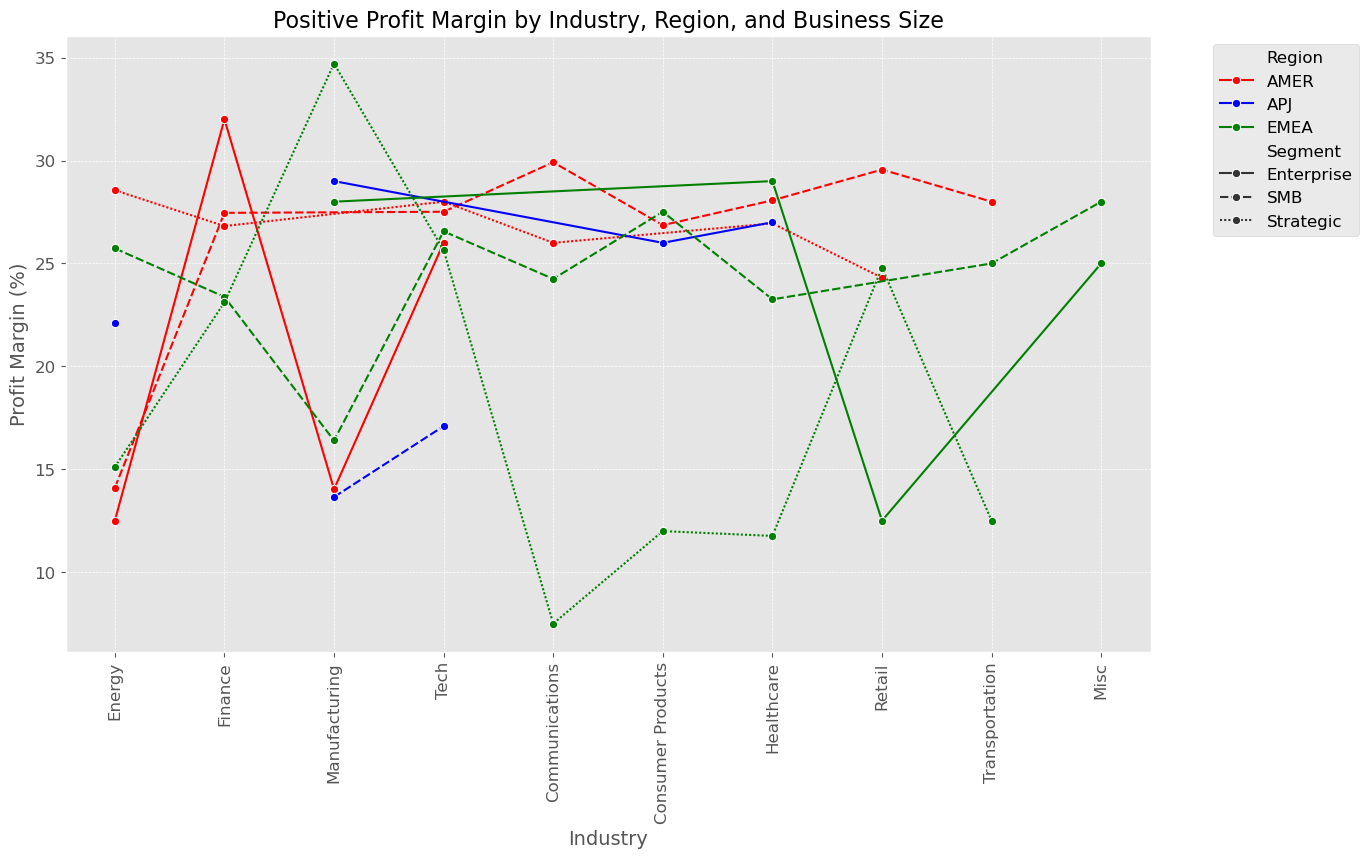

In [12]:
# Filter the data to include only positive profit margins
positive_metrics = metrics_sorted[metrics_sorted['profit_margin'] > 0]

plt.figure(figsize=(14, 8))
sns.lineplot(data=positive_metrics, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Positive Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [13]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])


#### Cross-segment SMB

In [14]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

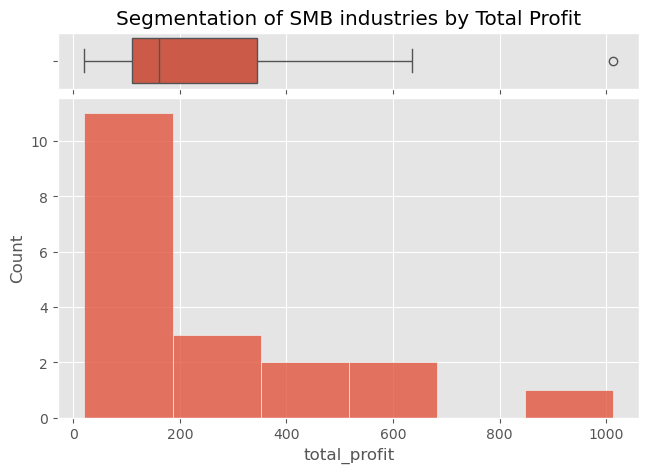

0.0000     20.9750
0.2500    110.6801
0.5000    160.4328
0.7500    345.0004
1.0000   1012.3206
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 345.00 in profit
- 3 (Good) : Contributes between 160.43 and 345.00 in profit
- 2 (Marginal) : Contributes between 110.68 and 160.43 in profit
- 1 (Underperforming) : Contributes less than 110.68 in profit


In [15]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [16]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
43,EMEA,SMB,Finance,1012.3206,0.0667,4
5,AMER,SMB,Consumer Products,635.5714,0.0400,4
9,AMER,SMB,Retail,589.6892,0.0000,4
44,EMEA,SMB,Healthcare,411.5456,0.1500,4
40,EMEA,SMB,Communications,394.1823,0.1200,4
41,EMEA,SMB,Consumer Products,295.8184,0.0800,3
7,AMER,SMB,Finance,254.2647,0.0000,3
10,AMER,SMB,Tech,197.7936,0.0000,3
47,EMEA,SMB,Tech,171.5264,0.0000,3
42,EMEA,SMB,Energy,160.4328,0.0000,2


In [17]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in EMEA, Consumer Products in AMER, Retail in AMER, Healthcare in EMEA, Communications in EMEA are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Consumer Products in EMEA, Finance in AMER, Tech in AMER, Tech in EMEA all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Energy in EMEA, Misc in EMEA, Healthcare in AMER, Energy in AMER, Manufacturing in EMEA, Manufacturing in APJ, Transportation in AMER, Tech in APJ, Communications in AMER, Transportation in EMEA are underperforming.
These SMB industries struggle with profitability and should be approached with caution.
Strategies should focus 

In [18]:
###Filter negative profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_negative_profit_metrics = smb_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

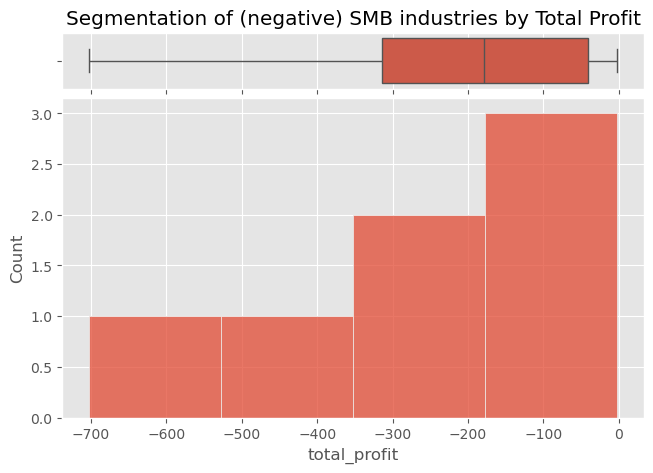

0.0000   -703.0296
0.2500   -314.2451
0.5000   -178.9668
0.7500    -41.0688
1.0000     -1.8264
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -314.25 in profit
- 3 (Significant) : Loses between -314.25 and -178.97 in profit
- 2 (Negative) : Loses between -178.97 and -41.07 in profit
- 1 (Marginal) : Loses less than -41.07 in profit


In [19]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [20]:
smb_negative_profit_metrics['segmentation score'] = pd.qcut(
    smb_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

smb_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
24,APJ,SMB,Consumer Products,-703.0296,0.6000,4
25,APJ,SMB,Finance,-427.1372,0.8000,4
29,APJ,SMB,Retail,-201.3530,0.4000,3
23,APJ,SMB,Communications,-178.9668,0.8000,3
26,APJ,SMB,Healthcare,-74.7456,0.8000,2
28,APJ,SMB,Misc,-7.3920,0.8000,1
31,APJ,SMB,Transportation,-1.8264,0.4000,1


In [21]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_negative_profit_metrics[smb_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are SMB industries contributing to substantial losses and are considered high-risk.\nStrategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "all suffer notable losses.\nCareful analysis and targeted strategies are essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Consumer Products in APJ, Finance in APJ are SMB industries contributing to substantial losses and are considered high-risk.
Strategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Retail in APJ, Communications in APJ all suffer notable losses.
Careful analysis and targeted strategies are essential to stabilize and mitigate further declines.

Healthcare in APJ, Misc in APJ, Transportation in APJ incur moderate losses.
They require attention to prevent slipping into more significant losses.



It's important to note that all losses from the SMB segment are from APJ. 

In [ ]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the SMB segment
total_metrics_SMB = prod10_2023.query("Segment == 'SMB'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with net_profit < 0 filter
prod10_2023_industry_region_SMB = prod10_2023.query("Segment == 'SMB' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
SMB_account = prod10_2023.query("Segment == 'SMB'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod10_2023_percents_SMB = SMB_account.merge(prod10_2023_industry_region_SMB, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod10_2023_percents_SMB = prod10_2023_percents_SMB.dropna()

# Calculate percentages
prod10_2023_percents_SMB['% Account'] = prod10_2023_percents_SMB['account'] / SMB_account['account'].sum() * 100
prod10_2023_percents_SMB['% Quantity'] = prod10_2023_percents_SMB['Quantity'] / total_metrics_SMB['Quantity'] * 100
prod10_2023_percents_SMB['% Sales'] = prod10_2023_percents_SMB['Sales'] / total_metrics_SMB['Sales'] * 100
prod10_2023_percents_SMB['% Net Revenue'] = prod10_2023_percents_SMB['discounted_sales'] / total_metrics_SMB['discounted_sales'] * 100

# Filter data for specific industries and regions 
specific_industries = ['Consumer Products', 'Finance']
specific_regions = ['APJ']
filtered_SMB = prod10_2023_percents_SMB[(prod10_2023_percents_SMB['Industry'].isin(specific_industries)) & 
                                       (prod10_2023_percents_SMB['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_SMB.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

In [23]:
filtered_percentages

,,% Account,% Quantity,% Sales,% Net Revenue
Industry,Region,,,,
Consumer Products,APJ,4.4944,2.4000,1.3776,0.2947
Finance,APJ,3.3708,2.9333,0.7617,0.1629


- In the SMB segment, APJ's Consumer Products and Finance industries contribute to the most severe losses. Despite Consumer Products and Finance holding significant SMB shares (Consumer Products: 14.61% in Total Accounts, 18.36% in Net Revenue; Finance: 22.47% in Total Accounts, 23.86% in Net Revenue), those within the 'Severe' loss category contribute minimally. For instance, Consumer Products industries in APJ (specifically those with negative profits) constitutes for just 4.5% of Total Accounts and around 0.3% of Net Revenue (post-discount sales). If reducing discounts isn't feasible for these industries, it may be necessary to accept the loss of sales from them.

To assess the impact of high discounts on net profits, I compared two datasets: one without a filter for negative profits and another with a filter for net profits less than zero.

In [25]:
# to see detailed Discounted orders for the SMB "Severe" Category
filtered_SMB2 = prod10_2023[(prod10_2023['Industry'].isin(specific_industries)) & (prod10_2023['Region'].isin(specific_regions)) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [26]:
# Dataset Without Filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Consumer Products,APJ,0.0000,1
1,Consumer Products,APJ,0.8000,3
2,Finance,APJ,0.8000,3


In [27]:
# Dataset With Filter (prod10_2023['net_profit'] < 0) 
filtered_SMB2 = prod10_2023[(prod10_2023['Industry'].isin(specific_industries)) & (prod10_2023['Region'].isin(specific_regions)) & (prod10_2023['net_profit'] < 0) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [28]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Consumer Products,APJ,0.8000,3
1,Finance,APJ,0.8000,3


By comparing the two datasets, I identified orders with negative net profits. This analysis showed that higher discounts (0.80) consistently appeared in both datasets, particularly in the filtered one for negative profits. 

Negative profits are thus associated with discounted orders, suggesting these discounts may have been applied without thorough profitability assessments. Proper evaluations should include analyzing the impact on net margins, understanding the cost structure, assessing customer acquisition costs, and ensuring the discount strategy aligns with overall financial goals. Thorough calculations would help ensure discounts contribute positively to profitability rather than resulting in losses.

#### Cross-segment Strategic

In [29]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

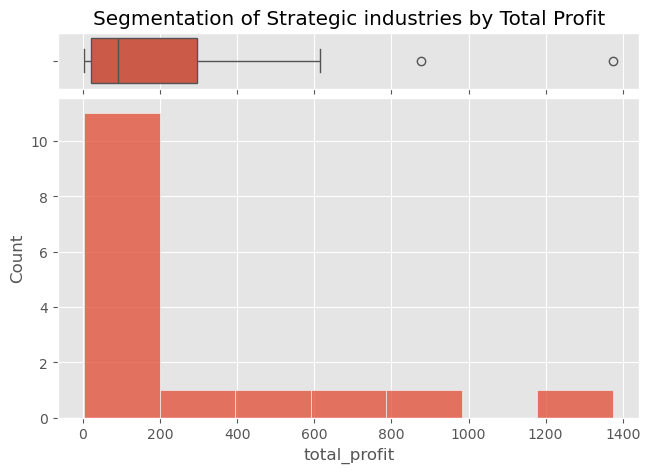

0.0000      3.6588
0.2500     20.9840
0.5000     90.3132
0.7500    294.4581
1.0000   1374.3911
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 294.46 in profit
- 3 (Good) : Contributes between 90.31 and 294.46 in profit
- 2 (Marginal) : Contributes between 20.98 and 90.31 in profit
- 1 (Underperforming) : Contributes less than 20.98 in profit


In [30]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [31]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
52,EMEA,Strategic,Finance,1374.3911,0.0750,4
15,AMER,Strategic,Healthcare,875.7077,0.0200,4
14,AMER,Strategic,Finance,613.5975,0.0571,4
32,APJ,Strategic,Energy,552.3160,0.6000,4
51,EMEA,Strategic,Energy,208.5055,0.1333,3
54,EMEA,Strategic,Manufacturing,160.1058,0.0000,3
55,EMEA,Strategic,Retail,150.8834,0.0800,3
17,AMER,Strategic,Tech,106.7808,0.0000,3
56,EMEA,Strategic,Tech,73.8457,0.0667,2
57,EMEA,Strategic,Transportation,48.6320,0.2000,2


In [34]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Finance in EMEA, Healthcare in AMER, Finance in AMER, Energy in APJ are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Energy in EMEA, Manufacturing in EMEA, Retail in EMEA, Tech in AMER all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Tech in EMEA, Transportation in EMEA, Energy in AMER, Retail in AMER, Consumer Products in EMEA, Healthcare in EMEA, Communications in AMER, Communications in EMEA are underperforming.
These Strategic industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy mar

In [35]:
###Filter negative profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Strategic segment
strategic_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_negative_profit_metrics = strategic_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

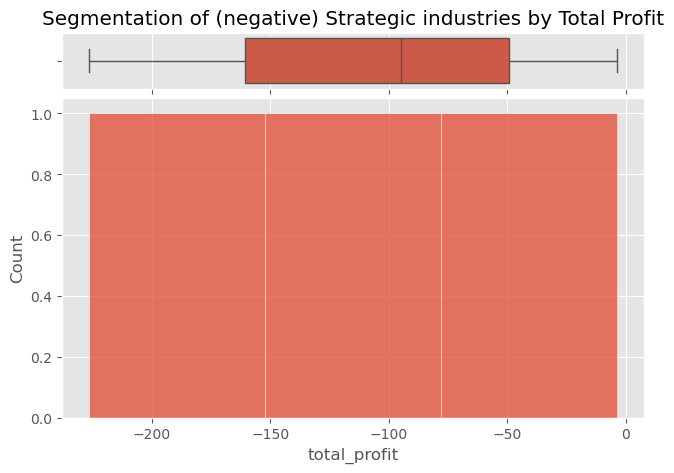

0.0000   -226.6368
0.2500   -160.7586
0.5000    -94.8804
0.7500    -49.2259
1.0000     -3.5715
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -160.76 in profit
- 3 (Significant) : Loses between -160.76 and -94.88 in profit
- 2 (Negative) : Loses between -94.88 and -49.23 in profit
- 1 (Marginal) : Loses less than -49.23 in profit


In [36]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [37]:
strategic_negative_profit_metrics['segmentation score'] = pd.qcut(
    strategic_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

strategic_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
35,APJ,Strategic,Tech,-226.6368,0.8000,4
33,APJ,Strategic,Finance,-94.8804,0.8000,3
34,APJ,Strategic,Healthcare,-3.5715,0.5333,1


In [38]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_negative_profit_metrics[strategic_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are Strategic industries contributing to substantial losses and are considered high-risk.\nKey improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "all suffer notable losses.\nCareful analysis and targeted strategies are essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Tech in APJ are Strategic industries contributing to substantial losses and are considered high-risk.
Key improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Finance in APJ all suffer notable losses.
Careful analysis and targeted strategies are essential to stabilize and mitigate further declines.

Healthcare in APJ incur moderate losses.
They require attention to prevent slipping into more significant losses.



Like the SMB segment, all losses from the Strategic segment are from APJ. 

In [43]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the Strategic segment
total_metrics_Strategic = prod10_2023.query("Segment == 'Strategic'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with net_profit < 0 filter <------------change to see total share 
prod10_2023_industry_region_Strategic = prod10_2023.query("Segment == 'Strategic' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
Strategic_account = prod10_2023.query("Segment == 'Strategic'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod10_2023_percents_Strategic = Strategic_account.merge(prod10_2023_industry_region_Strategic, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod10_2023_percents_Strategic = prod10_2023_percents_Strategic.dropna()

# Calculate percentages
prod10_2023_percents_Strategic['% Account'] = prod10_2023_percents_Strategic['account'] / Strategic_account['account'].sum() * 100
prod10_2023_percents_Strategic['% Quantity'] = prod10_2023_percents_Strategic['Quantity'] / total_metrics_Strategic['Quantity'] * 100
prod10_2023_percents_Strategic['% Sales'] = prod10_2023_percents_Strategic['Sales'] / total_metrics_Strategic['Sales'] * 100
prod10_2023_percents_Strategic['% Net Revenue'] = prod10_2023_percents_Strategic['discounted_sales'] / total_metrics_Strategic['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Tech', 'Finance', 'Healthcare'] 
specific_regions = ['APJ']
filtered_Strategic = prod10_2023_percents_Strategic[(prod10_2023_percents_Strategic['Industry'].isin(specific_industries)) & 
                                       (prod10_2023_percents_Strategic['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_Strategic.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

To assess the impact of high discounts on net profits, I compared two datasets: one without a filter for negative profits and another with a filter for net profits less than zero.

In [44]:
# to see detailed Discounted orders for the Strategic "Severe" Category
filtered_Strategic2 = prod10_2023[(prod10_2023['Industry'].isin(specific_industries)) & (prod10_2023['Region'].isin(specific_regions)) ]
filtered_Strategic3 = filtered_Strategic2[filtered_Strategic2['Segment'] == 'Strategic']
grouped_data = filtered_Strategic3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [45]:
# Dataset Without Filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Finance,APJ,0.8000,2
1,Healthcare,APJ,0.0000,1
2,Healthcare,APJ,0.8000,2
3,Tech,APJ,0.8000,1


In [46]:
# Dataset With Filter (prod10_2023['net_profit'] < 0) 
filtered_Strategic2 = prod10_2023[(prod10_2023['Industry'].isin(specific_industries)) & (prod10_2023['Region'].isin(specific_regions)) & (prod10_2023['net_profit'] < 0) ]
filtered_Strategic3 = filtered_Strategic2[filtered_Strategic2['Segment'] == 'Strategic']
grouped_data = filtered_Strategic3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [47]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Finance,APJ,0.8000,2
1,Healthcare,APJ,0.8000,2
2,Tech,APJ,0.8000,1


Similar to the SMB segment, this analysis revealed that higher discounts (0.80) consistently appeared in both datasets, especially in the one filtered for negative profits. A clear trend is emerging: very high discounts often lead to significant financial losses rather than boosting sales and profitability.

#### Cross-segment Enterprise

In [48]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

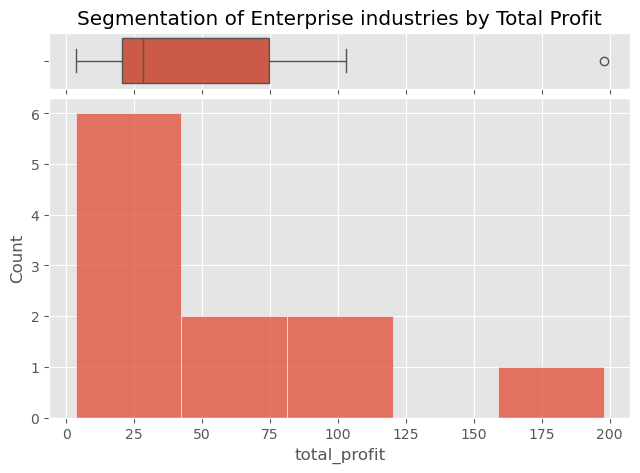

0.0000     3.4086
0.2500    20.4533
0.5000    28.3788
0.7500    74.5328
1.0000   197.9208
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 74.53 in profit
- 3 (Good) : Contributes between 28.38 and 74.53 in profit
- 2 (Marginal) : Contributes between 20.45 and 28.38 in profit
- 1 (Underperforming) : Contributes less than 20.45 in profit


In [49]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")

In [50]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
37,EMEA,Enterprise,Manufacturing,197.9208,0.0000,4
1,AMER,Enterprise,Finance,102.8871,0.0000,4
0,AMER,Enterprise,Energy,82.9920,0.2000,4
21,APJ,Enterprise,Manufacturing,66.0736,0.0000,3
20,APJ,Enterprise,Healthcare,56.5110,0.0000,3
2,AMER,Enterprise,Manufacturing,28.3788,0.1000,2
36,EMEA,Enterprise,Healthcare,26.5640,0.0000,2
39,EMEA,Enterprise,Retail,26.2240,0.2000,2
38,EMEA,Enterprise,Misc,14.6825,0.0000,1
3,AMER,Enterprise,Tech,11.2060,0.0000,1


In [51]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Manufacturing in EMEA, Finance in AMER, Energy in AMER are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Manufacturing in APJ, Healthcare in APJ all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Manufacturing in AMER, Healthcare in EMEA, Retail in EMEA, Misc in EMEA, Tech in AMER, Consumer Products in APJ are underperforming.
These Enterprise industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [52]:
###Filter negative profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_negative_profit_metrics = enterprise_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

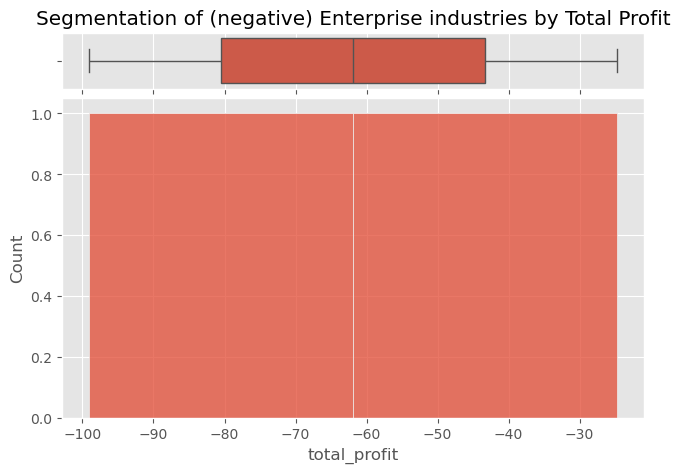

0.0000   -99.1032
0.2500   -80.5045
0.5000   -61.9059
0.7500   -43.3072
1.0000   -24.7086
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -80.50 in profit
- 3 (Significant) : Loses between -80.50 and -61.91 in profit
- 2 (Negative) : Loses between -61.91 and -43.31 in profit
- 1 (Marginal) : Loses less than -43.31 in profit


In [53]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [54]:
enterprise_negative_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

enterprise_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
22,APJ,Enterprise,Transportation,-99.1032,0.8000,4
19,APJ,Enterprise,Energy,-24.7086,0.8000,1


Enterprise segment exhibits a similar pattern, where substantial discounts, specifically 80%, are linked to negative profits. These high discounts, intended to boost sales, often fail to cover the associated costs, resulting in financial losses. Also, the negative profits all came from APJ.

It's quite possible that the high discounts were an attempt to boost sales in the APJ region. Offering significant discounts can be a strategy to increase sales volume, attract new customers, or clear out inventory. However, the data shows that these high discounts often led to negative profits, indicating that the strategy might not have been as effective as intended.

**Key findings:**
1. AMER in February, August, and October see robust sales and net profits, with August being the peak month. Discounts significantly impact profits in June and December.
2. EMEA in January, November, and December show strong sales and net profits, leading the overall performance despite discount impacts. January and September are notably affected by discounts. EMEA demonstrates the highest overall performance, with strong sales and net profits despite the impact of discounts.
3. APJ has lower overall sales, with peaks in June and December, but frequent negative net profits due to high discounts. Significant discounts in April and December drive negative profitability.
4. In the SMB segment, high-performing industries include Finance (EMEA), Consumer Products (AMER), Retail (AMER), Healthcare (EMEA), and Communications (EMEA). High-risk sectors like Consumer Products and Finance in APJ contribute to severe losses.
5. In the Strategic segment, Finance (EMEA & AMER), Healthcare (AMER), and Energy (APJ) lead performance, but Tech and Finance in APJ face significant losses. Stable industries require cautious discount management to maintain profitability.
6. In the Enterprise segment, Manufacturing (EMEA), Finance (AMER), and Energy (AMER) are top performers, while sectors like Consumer Products (APJ) and Tech (AMER) struggle with profitability. High discounts often lead to financial losses in struggling areas.
7. All significant losses across segments are predominantly from the APJ region. High discounts, likely intended to boost sales, often resulted in negative profits, suggesting the strategy may not have been as effective as intended.